In [1]:
 from google.colab import drive
 drive.mount('/content/gdrive')
 %cd'gdrive/My Drive/Colab Notebooks/Thesis/Vietnam/XGBoosting'

In [ ]:
import pandas as pd
data=pd.read_csv('baseline.csv')
test=data.copy()
test.head(60)

st_no   age     sex    wt  day_ill his_tired his_vomit      ttest  temp  \
0      1  13.0    Male  31.0        3        No       Yes        NaN   NaN   
1   1000  12.0  Female  37.0        2       Yes       Yes   Negative  38.0   
2   1002  11.0    Male  27.0        4       Yes        No   Positive  38.5   
3   1003  13.0    Male  20.0        3       Yes        No   Negative  38.0   
4   1004  11.0    Male  27.0        3       Yes       Yes   Negative  40.5   
5   1005  14.0    Male  60.0        4       Yes        No   Positive  38.5   
6   1006  11.0  Female  42.0        3        No       Yes   Negative  38.3   
7   1007   8.0  Female  29.0        3        No       Yes   Negative  38.0   
8   1008   9.0    Male  20.0        3       Yes        No   Negative  38.5   
9   1009   6.0    Male  32.0        2        No       Yes   Negative  38.5   
10   101   8.0    Male  22.0        4        No       Yes        NaN  39.0   
11  1010  10.0  Female  22.0        3       Yes       Yes   Positive  40.5   
12  1011  14.0    Male  55.0        4       Yes        No   Positive  39.0   
13  1012  13.0  Female  29.0        4        No        No   Negative  40.0   
14  1013   7.0  Female  17.0        2       Yes        No   Positive  40.0   
15  1014  13.0  Female  45.0        2       Yes        No   Positive  40.5   
16  1015  14.0  Female  45.0        4       Yes        No   Negative  39.5   
17  1016  12.0    Male  25.0        3       Yes        No   Positive  40.0   
18  1017   7.0  Female  22.0        3       Yes       Yes   Negative  39.5   
19  1018  10.0    Male  27.0        3       Yes       Yes   Negative  40.0   
20  1020   8.0    Male  35.0        2        No        No   Negative  39.5   
21  1021   9.0    Male  23.0        3        No        No   Negative  37.8   
22  1023   8.0  Female  22.0        3       Yes        No   Positive  38.0   
23  1024   9.0    Male  33.0        3       Yes       Yes   Negative  38.7   
24  1025   8.0    Male  32.0        4       Yes        No   Negative  38.3   
25  1026  13.0    Male  46.0        3       Yes       Yes   Negative  39.5   
26  1027  11.0    Male  38.0        3       Yes        No   Positive  39.0   
27  1028   9.0  Female  29.0        2       Yes       Yes   Negative  39.0   
28  1029  11.0  Female  27.0        3       Yes       Yes   Negative  39.0   
29  1030  14.0    Male  35.0        2        No       Yes   Negative  38.2   
30  1031   6.0  Female  20.0        3       Yes       Yes   Positive  38.5   
31  1032  10.0  Female  30.0        3       Yes        No   Positive  37.7   
32  1033   8.0    Male  25.0        2       Yes        No   Positive  39.5   
33  1034  11.0  Female  37.0        4       Yes        No   Positive  38.0   
34  1035   9.0    Male  52.5        3       Yes       Yes   Positive  39.0   
35  1036   8.0    Male  30.0        2       Yes       Yes   Positive  38.0   
36  1037   9.0    Male  43.0        3       Yes        No   Positive  40.0   
37  1038   8.0  Female  24.0        4       Yes        No   Positive  38.5   
38  1039   7.0    Male  23.0        3       Yes        No   Positive  38.5   
39  1040  13.0    Male  34.0        4       Yes        No   Negative  37.0   
40  1041  11.0    Male  30.0        4       Yes        No   Negative  38.3   
41  1042  12.0    Male  28.0        2       Yes        No   Positive  38.5   
42  1043  12.0  Female  36.0        3       Yes       Yes   Positive  38.0   
43  1044   8.0    Male  25.0        3       Yes        No   Negative  39.0   
44  1045  11.0    Male  70.0        4       Yes        No   Negative  40.0   
45  1046  13.0    Male  37.0        3       Yes        No   Negative  39.0   
46  1047  12.0  Female  24.0        3       Yes       Yes   Positive  38.0   
47  1048  14.0    Male  52.0        2       Yes        No   Positive  40.0   
48  1049  13.0  Female  34.0        4       Yes        No   Positive  39.0   
49  1050  12.0    Male  36.0        4       Yes        No   Positive  38.3   
50  1053  11.0  Female  4

In [ ]:
data.info()
data=data.replace('NA',None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   st_no           2301 non-null   object 
 1   age             2300 non-null   float64
 2   sex             2301 non-null   object 
 3   wt              2296 non-null   float64
 4   day_ill         2301 non-null   int64  
 5   his_tired       2298 non-null   object 
 6   his_vomit       2295 non-null   object 
 7   ttest           2289 non-null   object 
 8   temp            2299 non-null   float64
 9   pulse           2297 non-null   float64
 10  sys_bp          2298 non-null   float64
 11  mucosal_bleed   2283 non-null   object 
 12  abdominal_pain  2291 non-null   object 
 13  liver           2279 non-null   float64
 14  hct_bsl         2259 non-null   float64
 15  plt_bsl         2258 non-null   float64
 16  serotype2       2152 non-null   object 
 17  serology        2271 non-null   o

In [ ]:

data.drop(['st_no', 'doi_shock'],axis='columns', inplace = True)

In [ ]:
import numpy as np

In [ ]:
conversion_parameters = ['sex' ,'his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','serotype2','serology','to_PICU','shock','bleed_hos']
data[conversion_parameters] = np.where(pd.isnull(data[conversion_parameters]),data[conversion_parameters],data[conversion_parameters].astype(str))

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df = data.copy()

In [ ]:
df[conversion_parameters] = df[conversion_parameters].astype("str").apply(en.fit_transform)
df = df.where(~data.isna(), data)
df.head(60)


age  sex    wt  day_ill his_tired his_vomit ttest  temp  pulse  sys_bp  \
0   13.0    1  31.0        3         0         1   NaN   NaN    NaN     NaN   
1   12.0    0  37.0        2         1         1     1  38.0  100.0   100.0   
2   11.0    1  27.0        4         1         0     2  38.5   90.0    80.0   
3   13.0    1  20.0        3         1         0     1  38.0  100.0    90.0   
4   11.0    1  27.0        3         1         1     1  40.5  100.0    90.0   
5   14.0    1  60.0        4         1         0     2  38.5   90.0   110.0   
6   11.0    0  42.0        3         0         1     1  38.3  100.0   100.0   
7    8.0    0  29.0        3         0         1     1  38.0  100.0   100.0   
8    9.0    1  20.0        3         1         0     1  38.5  100.0   100.0   
9    6.0    1  32.0        2         0         1     1  38.5  100.0   100.0   
10   8.0    1  22.0        4         0         1   NaN  39.0   96.0   120.0   
11  10.0    0  22.0        3         1         1     2  40.5  120.0    90.0   
12  14.0    1  55.0        4         1         0     2  39.0  100.0    90.0   
13  13.0    0  29.0        4         0         0     1  40.0  120.0   100.0   
14   7.0    0  17.0        2         1         0     2  40.0  100.0    90.0   
15  13.0    0  45.0        2         1         0     2  40.5  100.0   110.0   
16  14.0    0  45.0        4         1         0     1  39.5  100.0    90.0   
17  12.0    1  25.0        3         1         0     2  40.0  100.0    90.0   
18   7.0    0  22.0        3         1         1     1  39.5  100.0    90.0   
19  10.0    1  27.0        3         1         1     1  40.0  100.0    90.0   
20   8.0    1  35.0        2         0         0     1  39.5  100.0   100.0   
21   9.0    1  23.0        3         0         0     1  37.8   92.0    90.0   
22   8.0    0  22.0        3         1         0     2  38.0  100.0    90.0   
23   9.0    1  33.0        3         1         1     1  38.7  100.0   110.0   
24   8.0    1  32.0        4         1         0     1  38.3  100.0   110.0   
25  13.0    1  46.0        3         1         1     1  39.5  120.0   120.0   
26  11.0    1  38.0        3         1         0     2  39.0  120.0   100.0   
27   9.0    0  29.0        2         1         1     1  39.0  120.0   100.0   
28  11.0    0  27.0        3         1         1     1  39.0  100.0    90.0   
29  14.0    1  35.0        2         0         1     1  38.2  100.0   100.0   
30   6.0    0  20.0        3         1         1     2  38.5  110.0   100.0   
31  10.0    0  30.0        3         1         0     2  37.7  100.0    80.0   
32   8.0    1  25.0        2         1         0     2  39.5  100.0   100.0   
33  11.0    0  37.0        4         1         0     2  38.0  100.0    90.0   
34   9.0    1  52.5        3         1         1     2  39.0  100.0    90.0   
35   8.0    1  30.0        2         1         1     2  38.0  100.0    90.0   
36   9.0    1  43.0        3         1         0     2  40.0  100.0   100.0   
37   8.0    0  24.0        4         1         0     2  38.5  100.0    90.0   
38   7.0    1  23.0        3         1         0     2  38.5  100.0    90.0   
39  13.0    1  34.0        4         1         0     1  37.0   90.0    90.0   
40  11.0    1  30.0        4         1         0     1  38.3  100.0   100.0   
41  12.0    1  28.0        2         1         0     2  38.5   98.0    80.0   
42  12.0    0  36.0        3         1         1     2  38.0   98.0    90.0   
43   8.0    1  25.0        3         1         0     1  39.0  100.0    90.0   
44  11.0    1  70.0        4         1         0     1  40.0  100.0    90.0   
45  13.0    1  37.0        3         1         0     1  39.0  100.0   100.0   
46  12.0    0  24.0        3         1         1     2  38.0  100.0   110.0   
47  14.0    1  52.0        2         1         0     2  40.0  100.0    90.0   
48  13.0    0  34.0        4         1         0     2  39.0  100.0   100.0   
49  12.0    1  36.0        4         1         0     2 

In [ ]:
# check unique values for the conversion
for labels in conversion_parameters:
    print(f'{labels} : ',df[labels].unique())

sex :  [1 0]
his_tired :  [0 1 nan]
his_vomit :  [1 0 nan]
ttest :  [nan 1 2 0]
mucosal_bleed :  [0 1 nan]
abdominal_pain :  [1 0 nan]
serotype2 :  [1 3 0 5 2 nan 4]
serology :  [nan 0 3 2 1]
to_PICU :  [1 0]
shock :  [1 0]
bleed_hos :  [nan 1 0 3 2]


In [ ]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 8.1 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=c8dee58a06a3299be0534ab21e1f7d61e4c27702bf840892d9d5d6eef44889b7
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=a1c5e9ba3f85c0ce332a79233248c3428e0d0b141b631a8f80f29569b4735ac1
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
import pandas as pd 
import numpy as np 
# importing the KNN from fancyimpute library 
from fancyimpute import KNN
import matplotlib.pyplot as plt


In [ ]:
# calling the KNN class 
knn_imputer = KNN() 
# imputing the missing value with knn imputer 
arr_knn= knn_imputer.fit_transform(df) 
  

Imputing row 1/2301 with 13 missing, elapsed time: 1.451
Imputing row 101/2301 with 0 missing, elapsed time: 1.454
Imputing row 201/2301 with 0 missing, elapsed time: 1.455
Imputing row 301/2301 with 0 missing, elapsed time: 1.457
Imputing row 401/2301 with 0 missing, elapsed time: 1.460
Imputing row 501/2301 with 0 missing, elapsed time: 1.462
Imputing row 601/2301 with 0 missing, elapsed time: 1.463
Imputing row 701/2301 with 0 missing, elapsed time: 1.465
Imputing row 801/2301 with 2 missing, elapsed time: 1.466
Imputing row 901/2301 with 0 missing, elapsed time: 1.468
Imputing row 1001/2301 with 0 missing, elapsed time: 1.469
Imputing row 1101/2301 with 0 missing, elapsed time: 1.470
Imputing row 1201/2301 with 0 missing, elapsed time: 1.472
Imputing row 1301/2301 with 0 missing, elapsed time: 1.473
Imputing row 1401/2301 with 0 missing, elapsed time: 1.474
Imputing row 1501/2301 with 0 missing, elapsed time: 1.475
Imputing row 1601/2301 with 0 missing, elapsed time: 1.475
Imputing

In [ ]:
df_knn = pd.DataFrame(data=arr_knn,columns=['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','serotype2','serology','to_PICU','shock','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8',])

#df_knn.iloc[56]

In [ ]:
df_knn = df_knn.astype(int)

In [ ]:
# check unique values for the conversion
for labels in conversion_parameters:
    print(f'{labels} : ',df_knn[labels].unique())

sex :  [1 0]
his_tired :  [0 1]
his_vomit :  [1 0]
ttest :  [1 2 0]
mucosal_bleed :  [0 1]
abdominal_pain :  [1 0]
serotype2 :  [1 3 0 5 2 4]
serology :  [1 0 3 2]
to_PICU :  [1 0]
shock :  [1 0]
bleed_hos :  [1 0 3 2]


XGBoosting

Whole Datasets

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [ ]:
X=df_knn.copy()
X.drop(['shock'],axis='columns', inplace = True)
y=df_knn.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# X_test=X_test.iloc[2]
# X_result=X_test.to_frame()
# X_test=X_test.loc(X_test.index[1])
#X_test=(X_test.head(5))
#X_test.head()


>1, train: 0.992, test: 0.981
>2, train: 0.993, test: 0.980
>3, train: 0.996, test: 0.977
>4, train: 0.999, test: 0.983
>5, train: 1.000, test: 0.984
>6, train: 1.000, test: 0.983
>7, train: 1.000, test: 0.980
>8, train: 0.999, test: 0.986
>9, train: 1.000, test: 0.986
>10, train: 1.000, test: 0.984
>11, train: 1.000, test: 0.984
>12, train: 1.000, test: 0.984
>13, train: 1.000, test: 0.984
>14, train: 1.000, test: 0.984
>15, train: 1.000, test: 0.984
>16, train: 1.000, test: 0.984
>17, train: 1.000, test: 0.984
>18, train: 1.000, test: 0.984
>19, train: 1.000, test: 0.984
>20, train: 1.000, test: 0.984
>21, train: 1.000, test: 0.984
>22, train: 1.000, test: 0.984
>23, train: 1.000, test: 0.984
>24, train: 1.000, test: 0.984
>25, train: 1.000, test: 0.984
>26, train: 1.000, test: 0.984
>27, train: 1.000, test: 0.984
>28, train: 1.000, test: 0.984
>29, train: 1.000, test: 0.984
>30, train: 1.000, test: 0.984
>31, train: 1.000, test: 0.984
>32, train: 1.000, test: 0.984
>33, train: 1.000

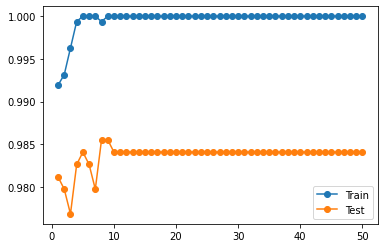

In [ ]:

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
for i in values:
	# configure the model
	model =xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 1,
                 max_depth =i, alpha = 10, n_estimators = 10)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


>1, train: 0.992, test: 0.981
>2, train: 0.993, test: 0.980
>3, train: 0.996, test: 0.977
>4, train: 0.999, test: 0.983
>5, train: 1.000, test: 0.984
>6, train: 1.000, test: 0.983
>7, train: 1.000, test: 0.980
>8, train: 0.999, test: 0.986
>9, train: 1.000, test: 0.986
>10, train: 1.000, test: 0.984
>11, train: 1.000, test: 0.984
>12, train: 1.000, test: 0.984
>13, train: 1.000, test: 0.984
>14, train: 1.000, test: 0.984
>15, train: 1.000, test: 0.984
>16, train: 1.000, test: 0.984
>17, train: 1.000, test: 0.984
>18, train: 1.000, test: 0.984
>19, train: 1.000, test: 0.984
>20, train: 1.000, test: 0.984
>21, train: 1.000, test: 0.984
>22, train: 1.000, test: 0.984
>23, train: 1.000, test: 0.984
>24, train: 1.000, test: 0.984
>25, train: 1.000, test: 0.984
>26, train: 1.000, test: 0.984
>27, train: 1.000, test: 0.984
>28, train: 1.000, test: 0.984
>29, train: 1.000, test: 0.984
>30, train: 1.000, test: 0.984
>31, train: 1.000, test: 0.984
>32, train: 1.000, test: 0.984
>33, train: 1.000

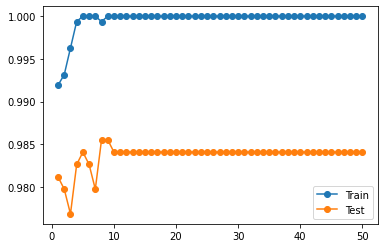

In [ ]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model =xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 1,
                 max_depth =i, alpha = 10, n_estimators = 10)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

[0]	validation_0-error:0.01118	validation_0-logloss:0.148353	validation_1-error:0.023155	validation_1-logloss:0.163624
[1]	validation_0-error:0.009317	validation_0-logloss:0.072302	validation_1-error:0.027496	validation_1-logloss:0.093271
[2]	validation_0-error:0.009317	validation_0-logloss:0.048841	validation_1-error:0.018813	validation_1-logloss:0.076599
[3]	validation_0-error:0.003106	validation_0-logloss:0.036124	validation_1-error:0.027496	validation_1-logloss:0.071122
[4]	validation_0-error:0.002484	validation_0-logloss:0.029518	validation_1-error:0.026049	validation_1-logloss:0.067298
[5]	validation_0-error:0.001863	validation_0-logloss:0.015496	validation_1-error:0.018813	validation_1-logloss:0.051473
[6]	validation_0-error:0.000621	validation_0-logloss:0.010925	validation_1-error:0.013025	validation_1-logloss:0.048312
[7]	validation_0-error:0	validation_0-logloss:0.009687	validation_1-error:0.015919	validation_1-logloss:0.047275
[8]	validation_0-error:0	validation_0-logloss:0.

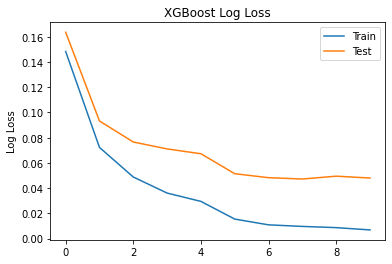

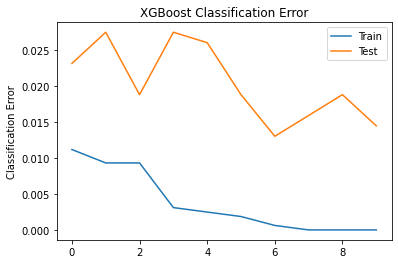

In [ ]:
model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 1,
                 max_depth =9, alpha = 10, n_estimators = 10)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [ ]:
# lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
# depths=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]


# for learning_rate in lr_list:
#   for depth in depths:
#     xg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = learning_rate,
#                 max_depth =depth, alpha = 10, n_estimators = 10)
#     xg_model=xg.fit(X_train, y_train)
#     predictions = xg_model.predict(X_test)

#     print("Learning rate: ", learning_rate)
#     print("Depth: ",depth)
    
#     print("Accuracy score (training): {0:.3f}".format(xg.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(xg.score(X_test, y_test)))

#     print("Confusion Matrix:")
#     cm = metrics.confusion_matrix(y_test, predictions)
#     cm_df = pd.DataFrame(cm, 
#             columns = ['Predicted Negative', 'Predicted Positive'],
#             index = ['Actual Negative', 'Actual Positive'])# Showing the confusion matrix
#     cm_df

#     print("Classification Report")
#     print(classification_report(y_test, predictions))
#     #Creating a function to report confusion metrics# save confusion matrix and slice into four pieces 
#     TP = cm[1][1]
#     TN = cm[0][0]
#     FP = cm[0][1]
#     FN = cm[1][0]  
#     print('True Positives:', TP)
#     print('True Negatives:', TN)
#     print('False Positives:', FP)
#     print('False Negatives:', FN)
    
#     #calculate accuracy
#     conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
#      # calculate mis-classification
#     conf_misclassification = 1- conf_accuracy
    
#      # calculate the sensitivity
#     conf_sensitivity = (TP / float(TP + FN))    # calculate the specificity
#     conf_specificity = (TN / float(TN + FP))
    
#      # calculate precision
#     conf_precision = (TN / float(TN + FP))    # calculate f_1 score
#     conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))   
#     conf_ppv=(TP/float(TP+FP))
#     conf_npv=(TN/float(TN+FN))
#     print('-'*50)
#     print(f'Accuracy: {round(conf_accuracy,2)}') 
#     print(f'Mis-Classification: {round(conf_misclassification,2)}') 
#     print(f'Sensitivity: {round(conf_sensitivity,2)}') 
#     print(f'Specificity: {round(conf_specificity,2)}') 
#     print(f'Precision: {round(conf_precision,2)}')
#     print(f'f_1 Score: {round(conf_f1,2)}')
#     print(f'PPV Score: {round(conf_ppv,2)}')
#     print(f'NPV Score: {round(conf_npv,2)}')
  


In [ ]:
X_test.head()

age  sex  wt  day_ill  his_tired  his_vomit  ttest  temp  pulse  sys_bp  \
1304   13    1  37        4          1          1      2    38    100      90   
1314   13    1  48        3          1          0      2    39    100     100   
1115   14    1  53        3          1          0      1    38    100     100   
56     12    1  35        4          0          1      1    37     88     100   
1524   11    0  50        4          1          1      2    40    120     100   

      ...  plt_bsl  serotype2  serology  to_PICU  bleed_hos  minPLT_3to8  \
1304  ...   130000          0         1        0          3        57000   
1314  ...   112000          2         0        0          3        48900   
1115  ...   151086          0         0        0          0        91000   
56    ...    46900          1         2        1          0        14000   
1524  ...   197000          0         3        0          3        82700   

      dminPLT_3to8  maxHCT_3to8  dmaxHCT_3to8  maxhemo_3to8  
1304             7           46             4            15  
1314             6           48             6            18  
1115             5           45             6            12  
56               6           48             5            20  
1524             7           41             7             6  

[5 rows x 24 columns]

MaxDepth=9 learning rate 1

In [ ]:
xg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate=1,
                max_depth =9, alpha = 10, n_estimators = 10)
xg_model=xg.fit(X_train, y_train)
predictions = xg.predict(X_test)
print(predictions)

# print("Confusion Matrix:")
# cm = metrics.confusion_matrix(y_test, predictions)
# cm_df = pd.DataFrame(cm, 
#             columns = ['Predicted Negative', 'Predicted Positive'],
#             index = ['Actual Negative', 'Actual Positive'])# Showing the confusion matrix
# cm_df

# print("Classification Report")
# print(classification_report(y_test, predictions))
#     #Creating a function to report confusion metrics# save confusion matrix and slice into four pieces 
# TP = cm[1][1]
# TN = cm[0][0]
# FP = cm[0][1]
# FN = cm[1][0]  
# print('True Positives:', TP)
# print('True Negatives:', TN)
# print('False Positives:', FP)
# print('False Negatives:', FN)
    
#     #calculate accuracy
# conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
#      # calculate mis-classification
# conf_misclassification = 1- conf_accuracy
    
#      # calculate the sensitivity
# conf_sensitivity = (TP / float(TP + FN))    # calculate the specificity
# conf_specificity = (TN / float(TN + FP))
    
#      # calculate precision
# conf_precision = (TN / float(TN + FP))    # calculate f_1 score
# conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))   
# conf_ppv=(TP/float(TP+FP))
# conf_npv=(TN/float(TN+FN))
# print('-'*50)
# print(f'Accuracy: {round(conf_accuracy,2)}') 
# print(f'Mis-Classification: {round(conf_misclassification,2)}') 
# print(f'Sensitivity: {round(conf_sensitivity,2)}') 
# print(f'Specificity: {round(conf_specificity,2)}') 
# print(f'Precision: {round(conf_precision,2)}')
# print(f'f_1 Score: {round(conf_f1,2)}')
# print(f'PPV Score: {round(conf_ppv,2)}')
# print(f'NPV Score: {round(conf_npv,2)}')
  


[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#def shock():


In [ ]:
#Calculating class probabilities
pred_proba = [i[1] for i in xg.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                       'pred_probs':pred_proba})

In [ ]:
 # Create figure.
plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [ ]:
# Create threshold values. 
thresholds = np.linspace(0, 1, 200)

In [ ]:
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
  true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
  false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
  return true_positive / (true_positive + false_negative)

In [ ]:
# # Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
  true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
  false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
  return 1 - (true_negative / (true_negative + false_positive))
    

In [ ]:
# # Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

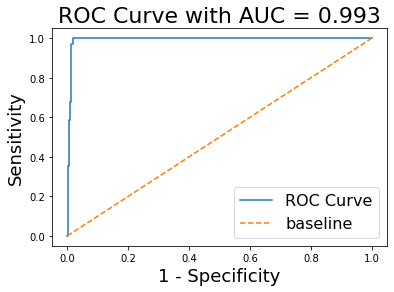

In [ ]:
 # Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
          label='ROC Curve')# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1,200),
        np.linspace(0, 1,200),
          label='baseline',
          linestyle='--')# Label axes.
plt.title(f"ROC Curve with AUC = {round(metrics.roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)# Create legend.
plt.legend(fontsize=16);


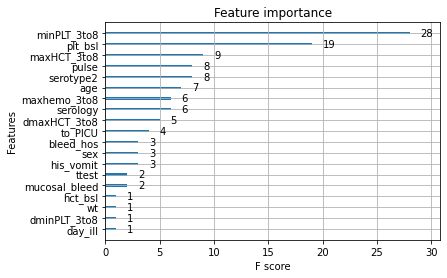

In [ ]:
xgb.plot_importance(xg_model)
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
import shap
import matplotlib.pylab as pl

In [ ]:
#xg_shap_values = shap.KernelExplainer(xg.predict,X_test)
X_predict=X_test.copy()
X_predict['Predictions']=predictions


In [ ]:

#shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
X_test.to_PICU.value_counts()

0    644
1     47
Name: to_PICU, dtype: int64

In [ ]:
X_test.minPLT_3to8.value_counts()

54000     11
20000     10
60000     10
84000     10
52000     10
          ..
77800      1
80100      1
103000     1
53300      1
31700      1
Name: minPLT_3to8, Length: 300, dtype: int64

In [ ]:
for i in df_knn['minPLT_3to8']:
  if (df_knn['shock'].any()==0):
     print(value.count())
   
        
            

for shock==1

In [ ]:
X_shock=df_knn.loc[df_knn['shock'] ==1]
X_shock.drop(['shock'],axis='columns', inplace = True)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
shap_values = shap.TreeExplainer(xg_model).shap_values(X_shock)

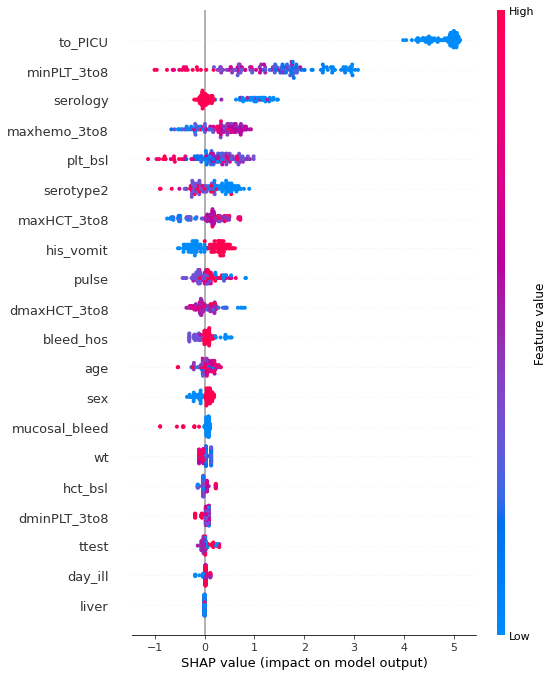

In [ ]:
shap.summary_plot(shap_values, X_shock)

for shock=0

In [ ]:
X_not_shock=df_knn.loc[df_knn['shock'] ==0]
X_not_shock.drop(['shock'],axis='columns', inplace = True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
shap_values = shap.TreeExplainer(xg_model).shap_values(X_not_shock)

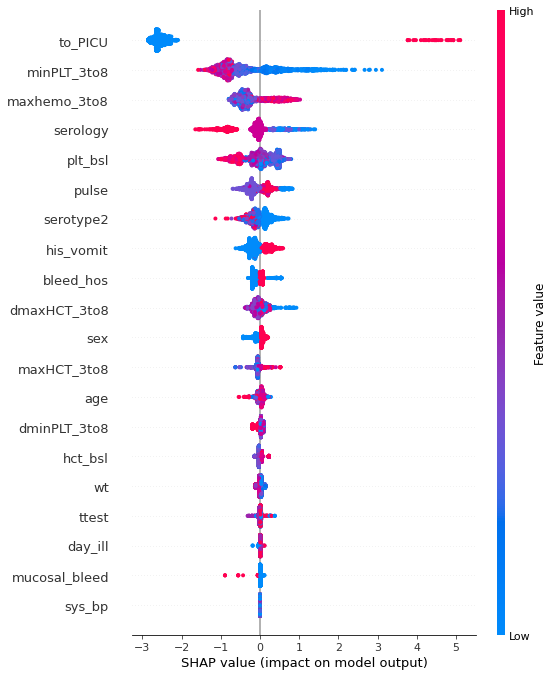

In [ ]:
shap.summary_plot(shap_values, X_not_shock)

In [ ]:


shap_values = shap.TreeExplainer(xg_model).shap_values(X)




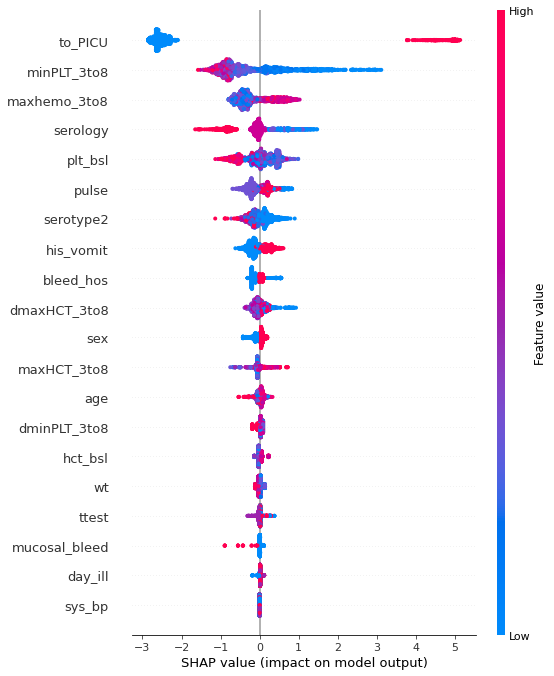

In [ ]:
shap.summary_plot(shap_values, X)

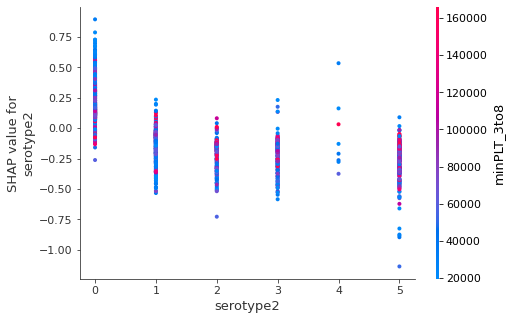

In [ ]:
shap.dependence_plot("serotype2", shap_values, X,interaction_index="minPLT_3to8")

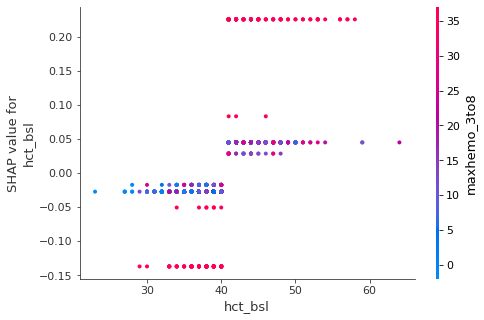

In [ ]:
shap.dependence_plot('hct_bsl', shap_values, X,interaction_index="maxhemo_3to8")

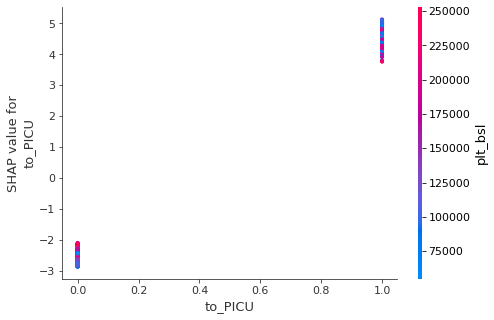

In [ ]:
shap.dependence_plot('to_PICU', shap_values, X)

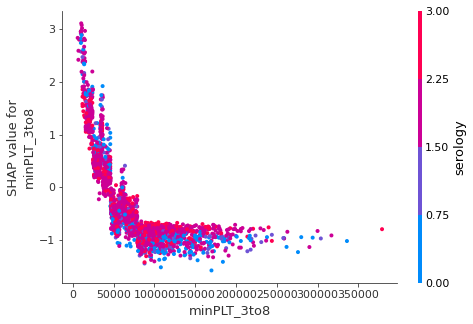

In [ ]:
shap.dependence_plot("minPLT_3to8", shap_values, X)

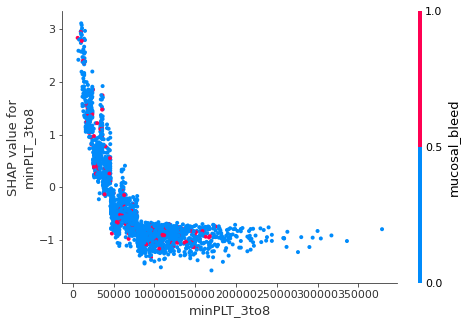

In [ ]:
shap.dependence_plot("minPLT_3to8", shap_values, X,interaction_index="mucosal_bleed")

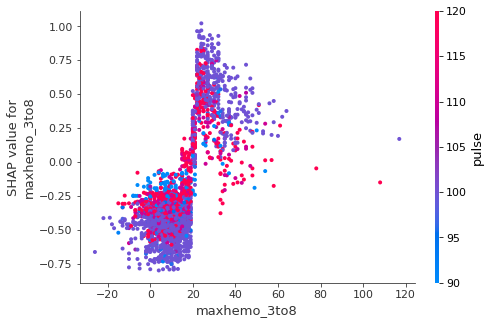

In [ ]:
shap.dependence_plot("maxhemo_3to8", shap_values, X)

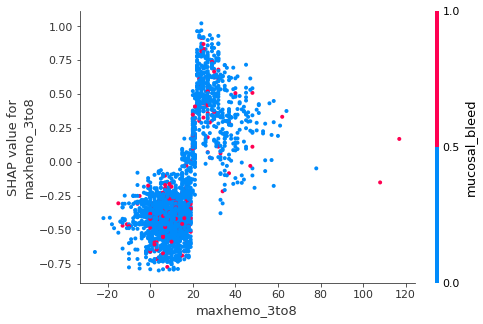

In [ ]:
shap.dependence_plot("maxhemo_3to8", shap_values, X,interaction_index="mucosal_bleed")

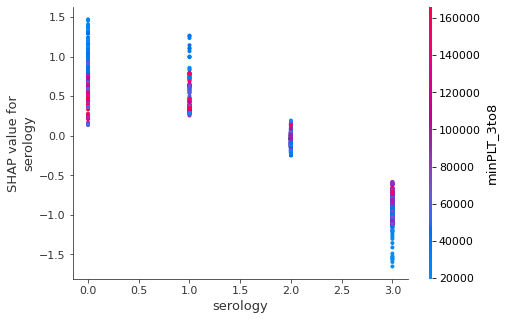

In [ ]:
shap.dependence_plot("serology", shap_values, X)

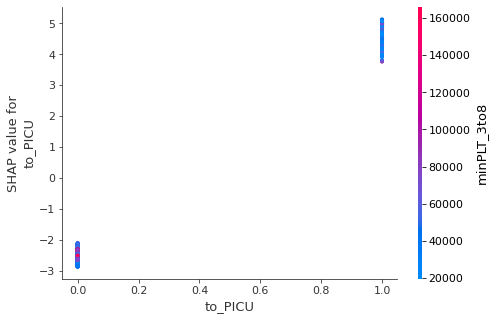

In [ ]:
shap.dependence_plot("to_PICU", shap_values, X,interaction_index="minPLT_3to8")

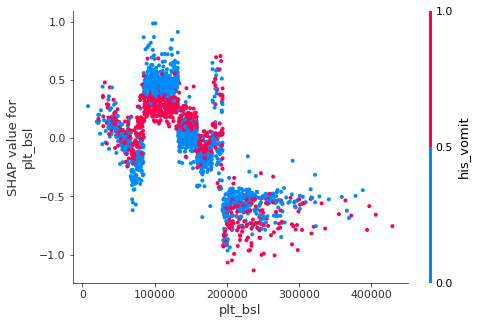

In [ ]:
shap.dependence_plot("plt_bsl", shap_values, X)

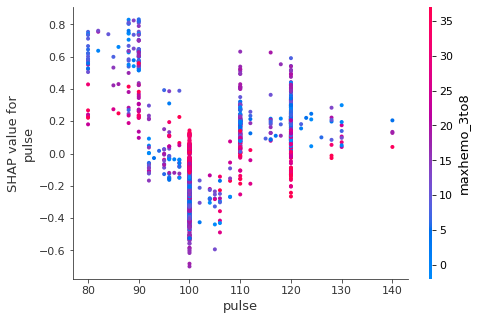

In [ ]:
shap.dependence_plot("pulse", shap_values, X)

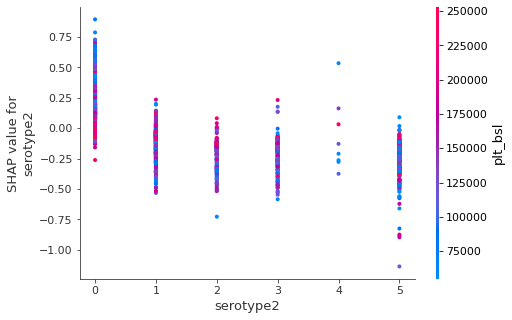

In [ ]:
shap.dependence_plot("serotype2", shap_values, X)

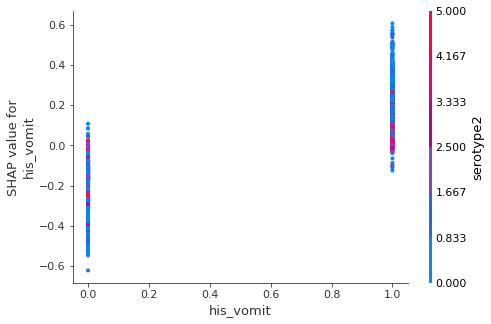

In [ ]:
shap.dependence_plot("his_vomit", shap_values, X)

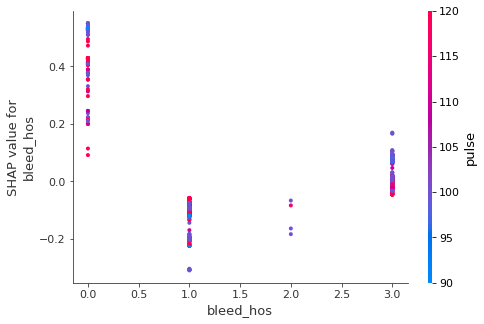

In [ ]:
shap.dependence_plot("bleed_hos", shap_values, X)

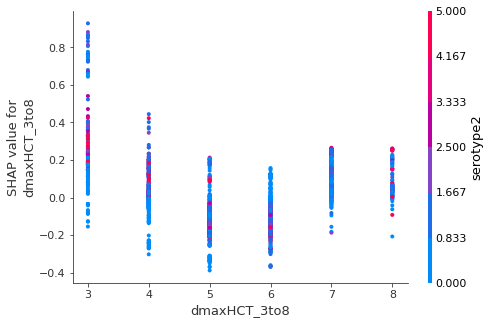

In [ ]:
shap.dependence_plot("dmaxHCT_3to8", shap_values, X)

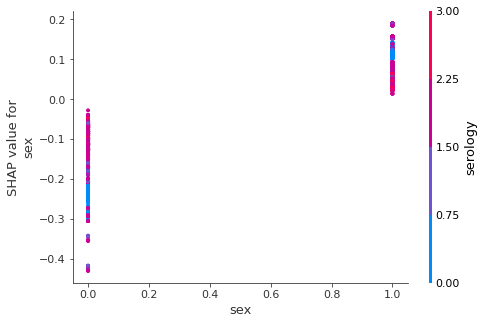

In [ ]:
shap.dependence_plot("sex", shap_values, X)

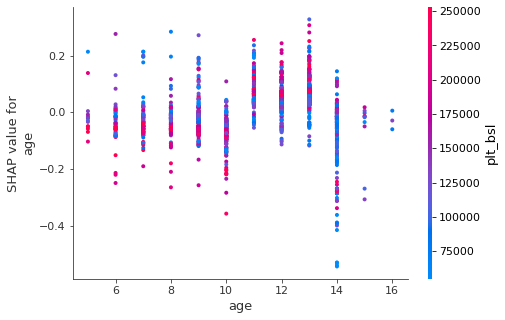

In [ ]:
shap.dependence_plot("age", shap_values, X)

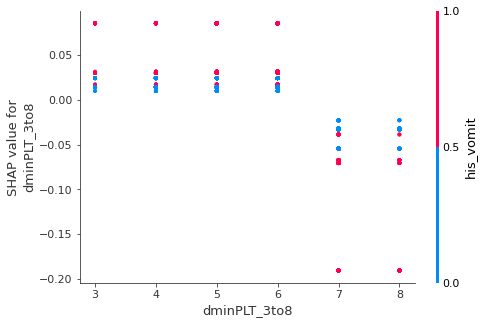

In [ ]:
shap.dependence_plot("dminPLT_3to8", shap_values, X)

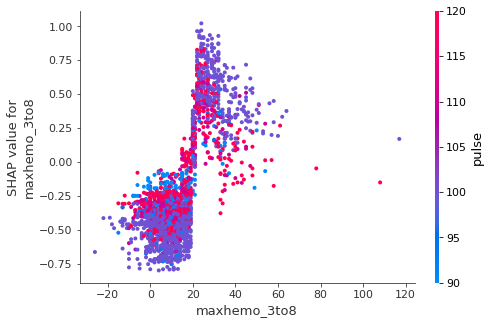

In [ ]:
shap.dependence_plot("maxhemo_3to8", shap_values, X)

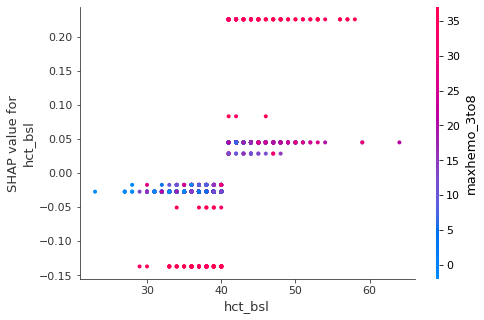

In [ ]:
shap.dependence_plot("hct_bsl", shap_values, X)

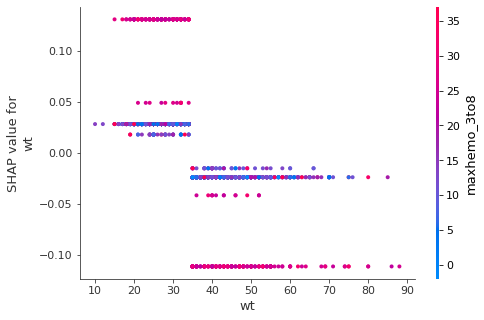

In [ ]:
shap.dependence_plot("wt", shap_values, X)

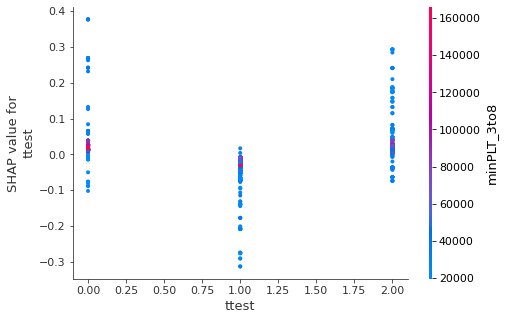

In [ ]:
shap.dependence_plot("ttest", shap_values, X)

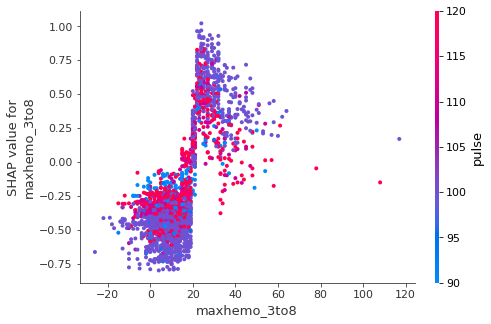

In [ ]:
shap.dependence_plot("maxhemo_3to8", shap_values, X)

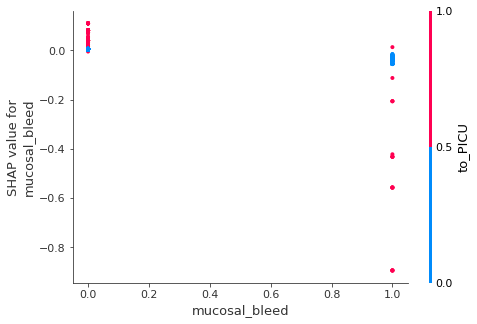

In [ ]:
shap.dependence_plot("mucosal_bleed", shap_values, X)

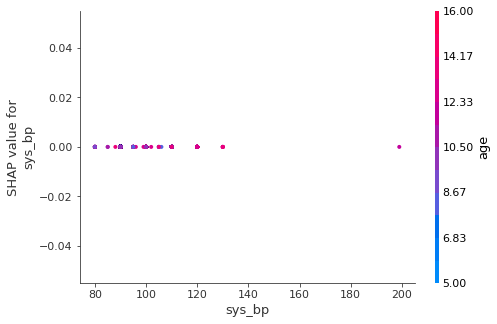

In [ ]:
shap.dependence_plot("sys_bp", shap_values, X)

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,10



Categorical Features Plot

In [ ]:
import math
import seaborn as sns

In [ ]:
Cat_vars=['sex','his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','serotype2','serology','to_PICU','bleed_hos']

In [ ]:
def trim_axs(axs,N):
  axs.flat
  for ax in axs[N:]:
    ax.remove()
  return axs[:N]

In [ ]:
# Cat_vars=[var for var in Cat_vars if var!='shock']
# ncols=3
# nrows=int(math.ceil(len(Cat_vars)/ncols))
# #f,axs=plt.subplots(nrows,ncols,figsize=(15,4*nrows),constrained_layout=True)
# #axs=trim_axs(axs,len(Cat_vars))
# f.suptitle('Categorical variavles')
# #for ax ,var in zip(axs,Cat_vars):
# for var in Cat_vars:
#   sns.countplot(df_knn['shock'],hue=df_knn[var],data=df_knn)
#   #ax.set_title(var)
#   plt.show()

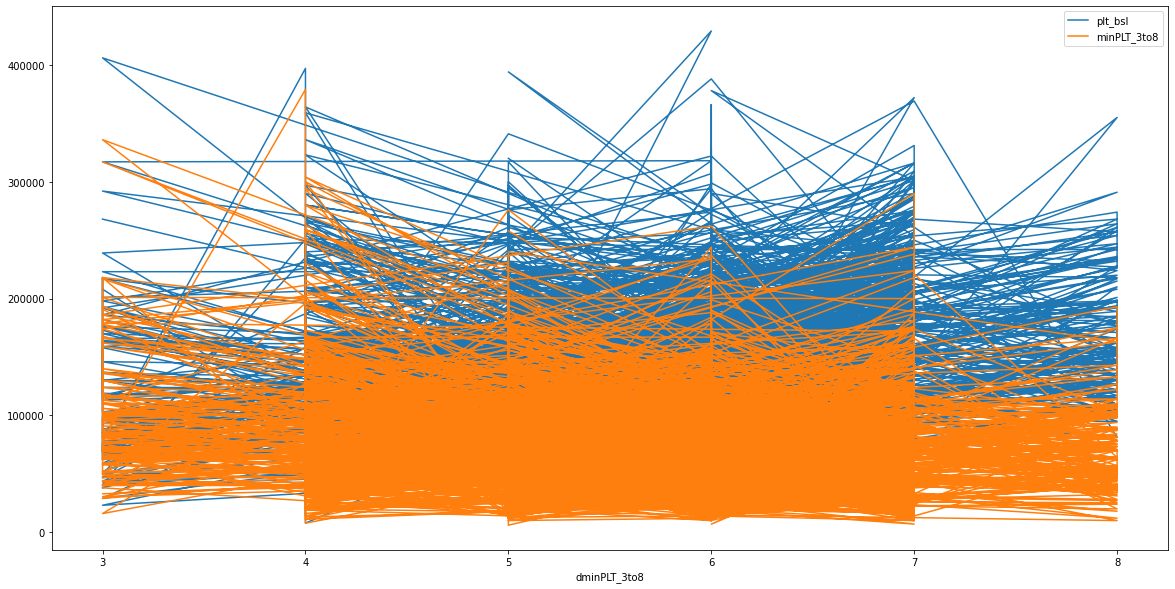

In [ ]:
import matplotlib.pyplot as plt
df.plot(x="dminPLT_3to8", y=["plt_bsl", "minPLT_3to8"])
plt.show()

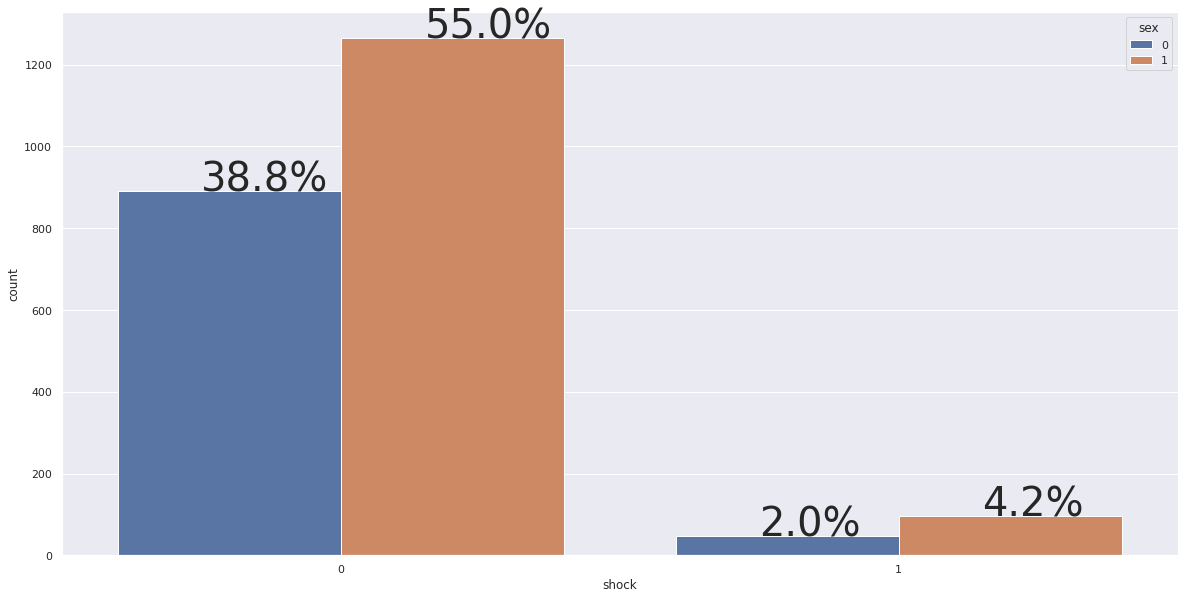

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="sex", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 40)
show()

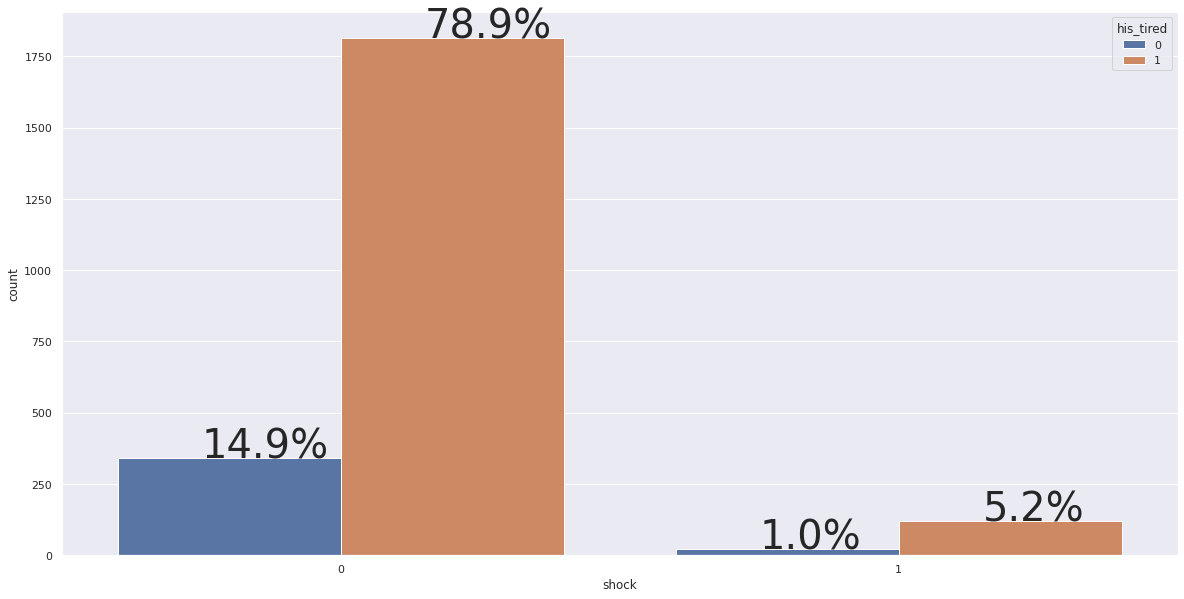

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="his_tired", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

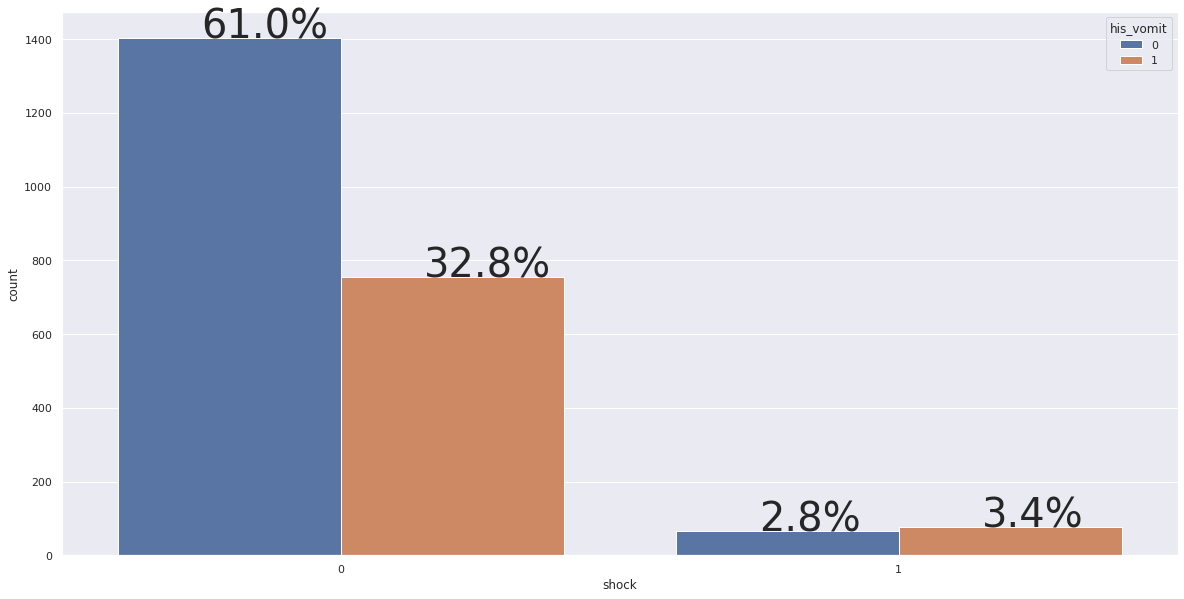

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="his_vomit", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

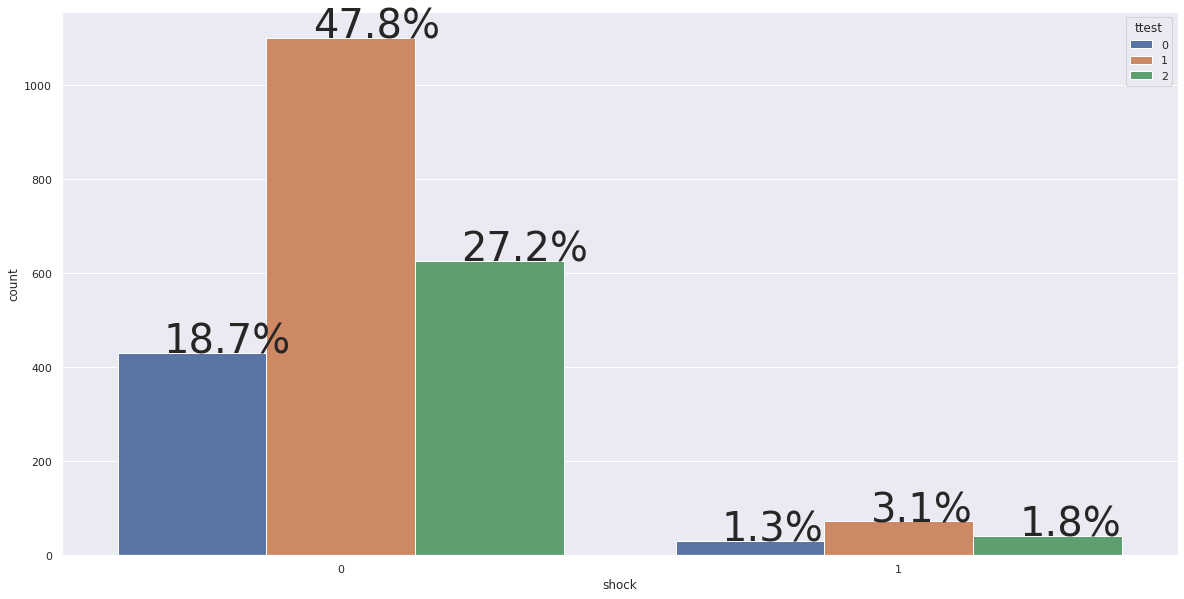

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="ttest", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

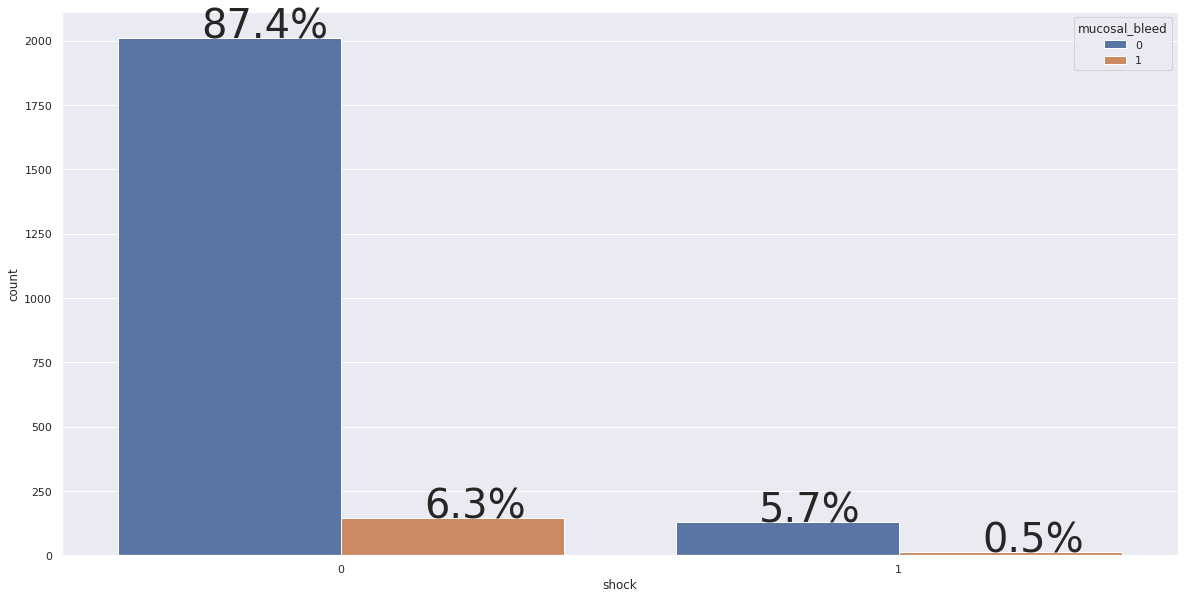

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="mucosal_bleed", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

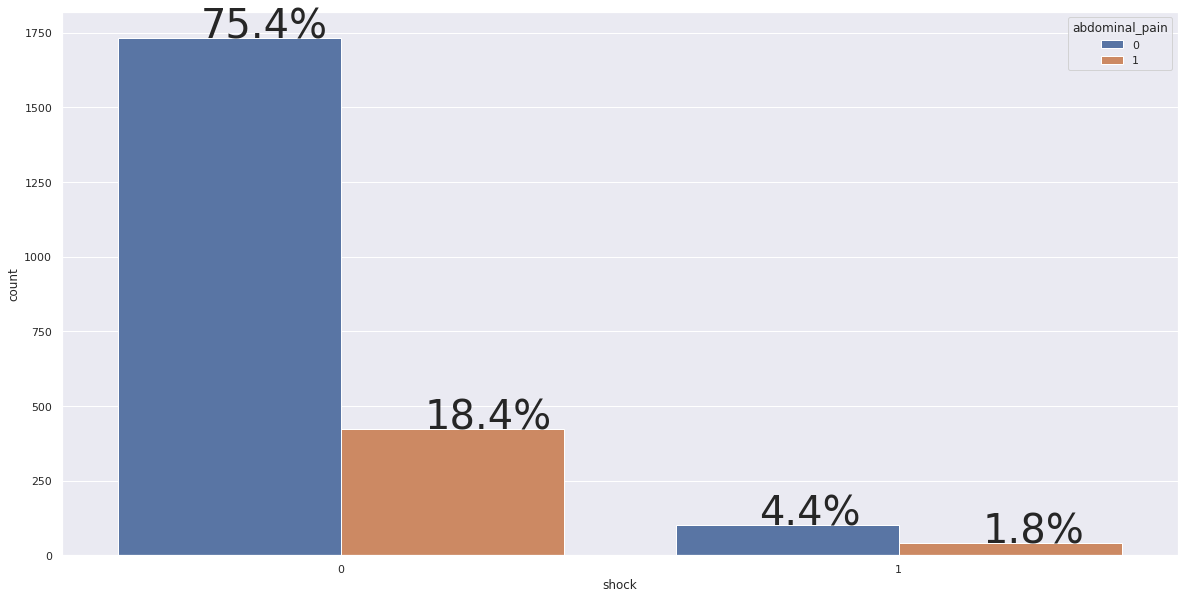

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="abdominal_pain", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

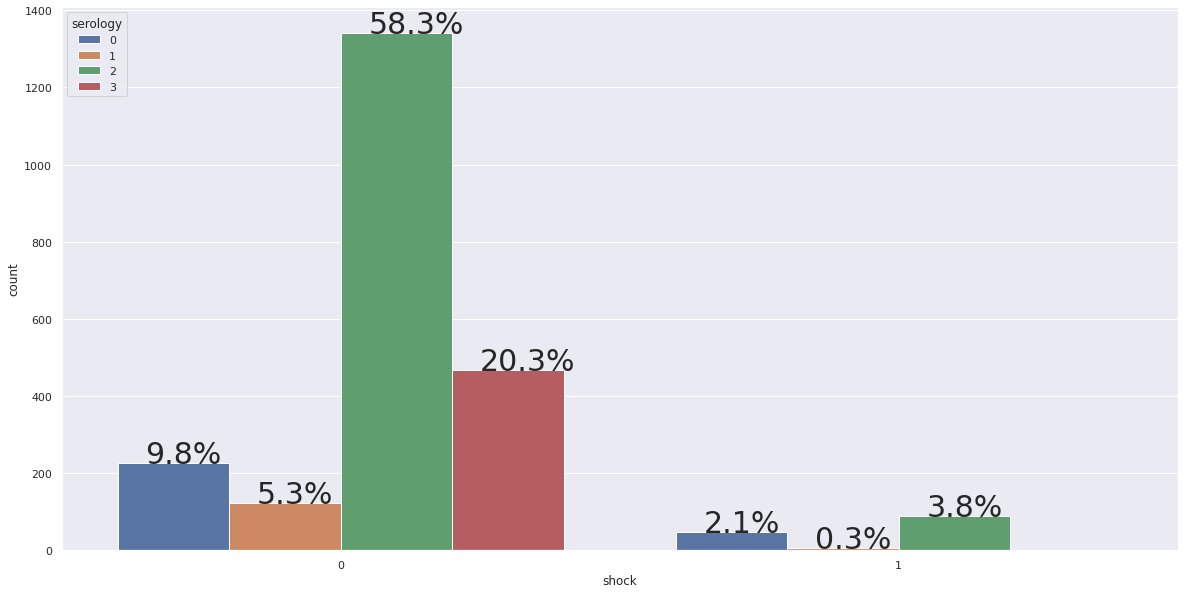

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="serology", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =30)
show()

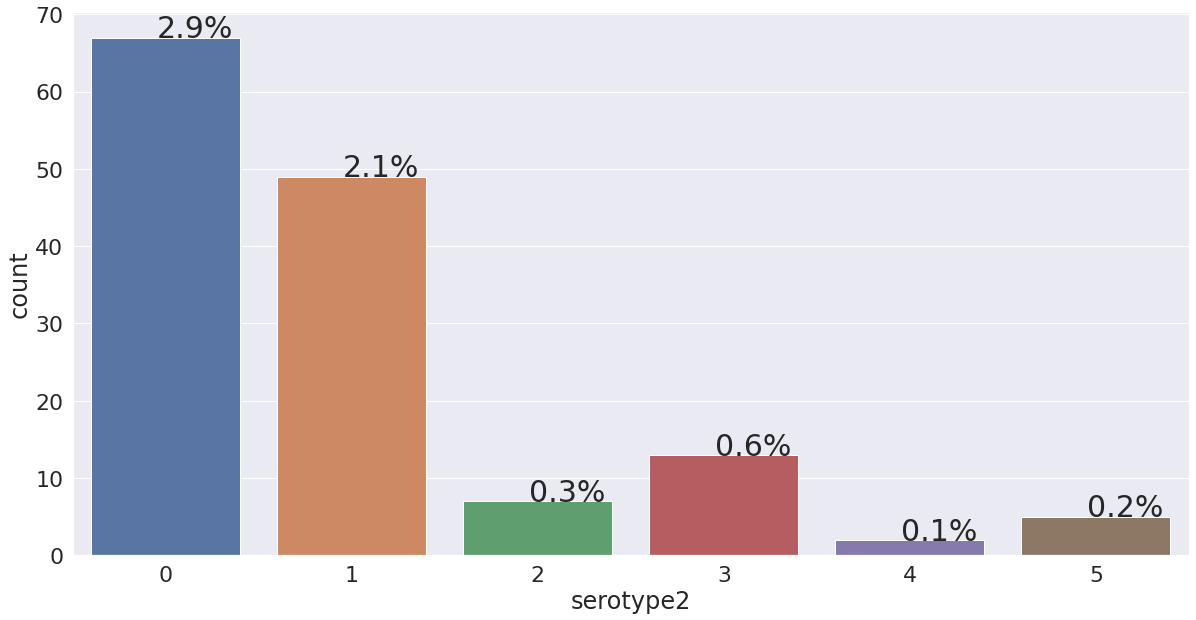

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid", font_scale=2.0)
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="serotype2", data=X_shock) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =30)
show()

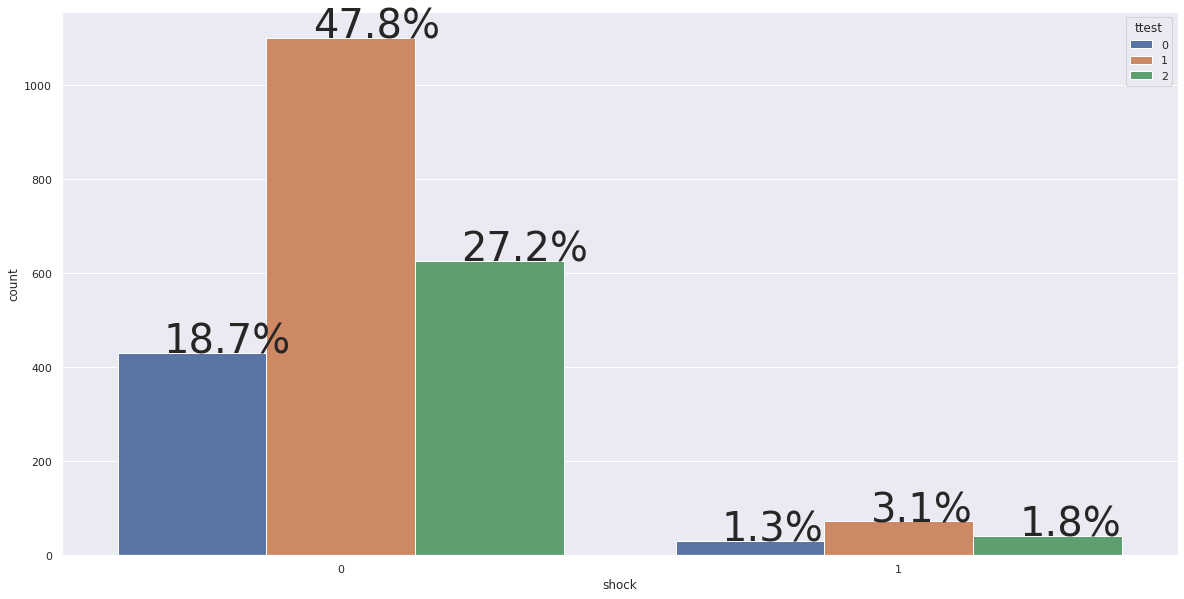

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="ttest", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

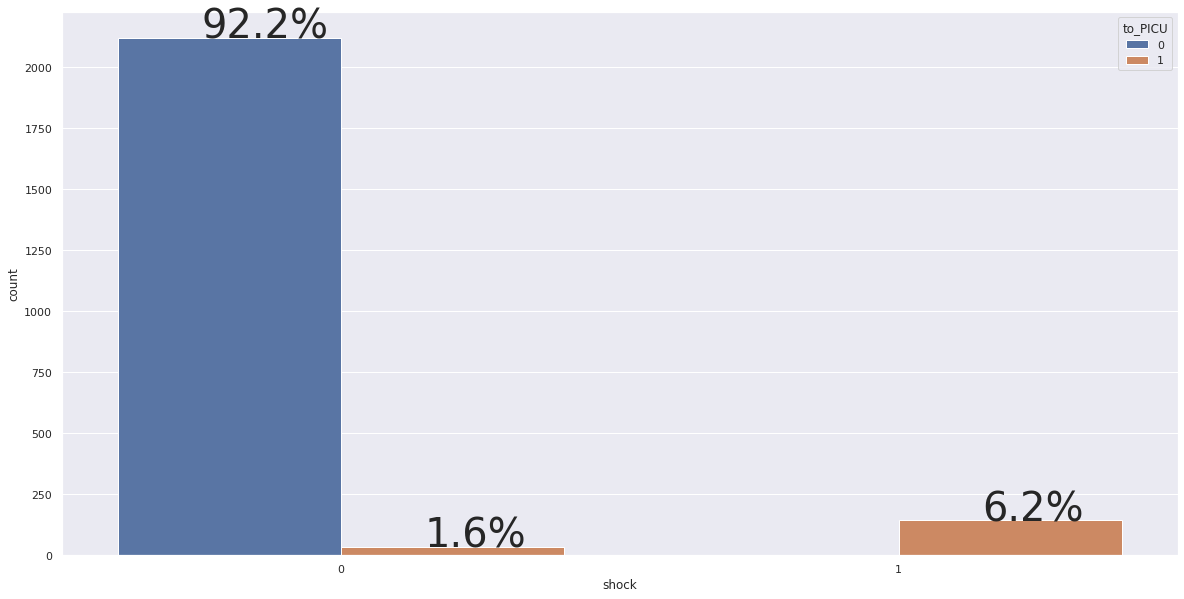

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="to_PICU", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

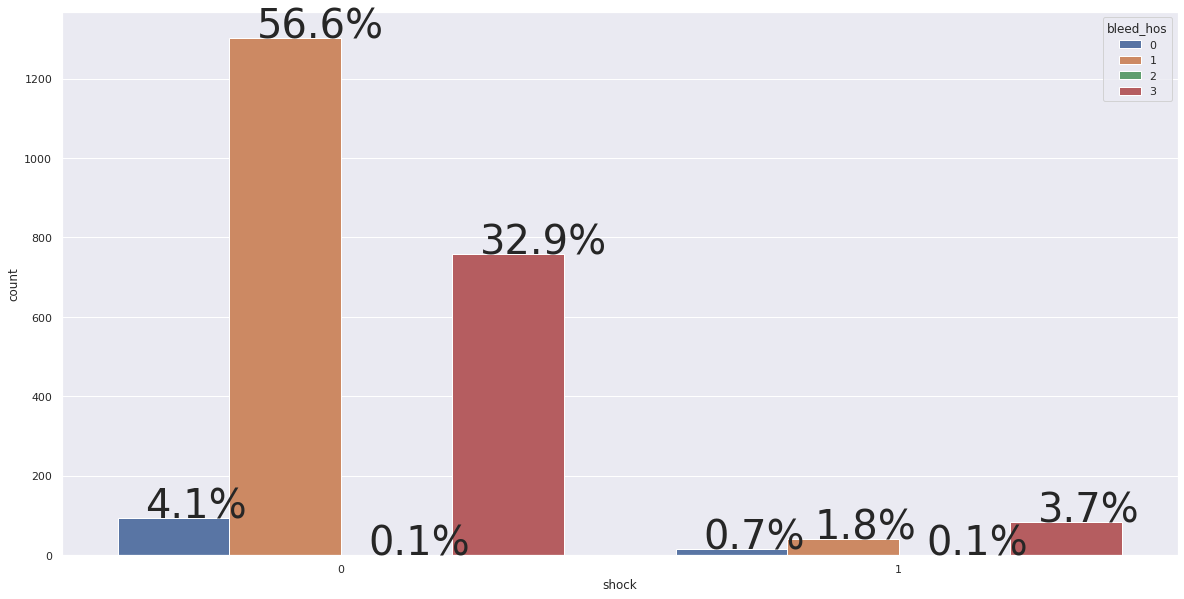

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="bleed_hos", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

Numerical Values

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


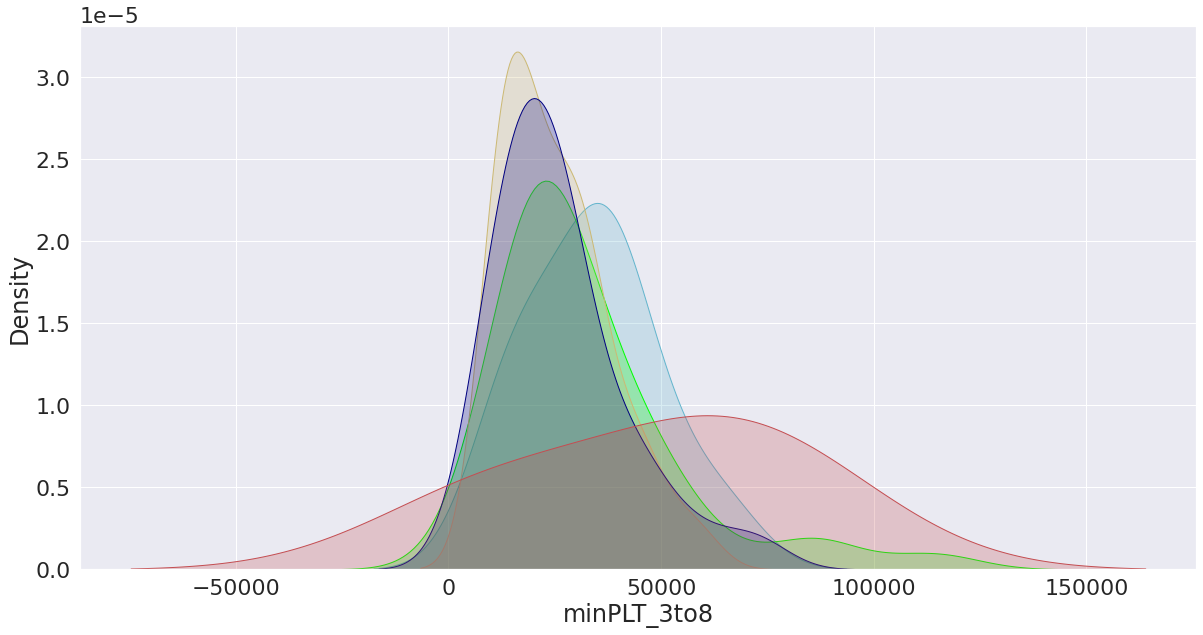

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid", font_scale=2.0)
total = float(len(X_shock)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
sns.kdeplot(X_shock.loc[(X_shock['dminPLT_3to8']==3), 
            'minPLT_3to8'], color='k', shade=True, Label='DAY 3') 
  
sns.kdeplot(X_shock.loc[(X_shock['dminPLT_3to8']==4), 
            'minPLT_3to8'], color='c', shade=True, Label='DAY 4') 
sns.kdeplot(X_shock.loc[(X_shock['dminPLT_3to8']==5), 
            'minPLT_3to8'], color='lime', shade=True, Label='DAY 5') 
sns.kdeplot(X_shock.loc[(X_shock['dminPLT_3to8']==6), 
            'minPLT_3to8'], color='y', shade=True, Label='DAY 6') 
sns.kdeplot(X_shock.loc[(X_shock['dminPLT_3to8']==7), 
            'minPLT_3to8'], color='navy', shade=True, Label='DAY 7') 
sns.kdeplot(X_shock.loc[(X_shock['dminPLT_3to8']==8), 
            'minPLT_3to8'], color='r', shade=True, Label='DAY 8') 
# sns.kdeplot(X_shock.loc[(X_shock['dminPLT_3to8']==8), 
#             'minPLT_3to8'], color='r', shade=True, Label='DAY ') 
# ax=sns.kdeplot(
#    data=X_shock, x="minPLT_3to8", hue="dminPLT_3to8",
#    fill=True, common_norm=False, palette="crest",
#    alpha=.5, linewidth=0,
# )

# for p in ax.patches:
#     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#     x = p.get_x() + p.get_width() / 2 - 0.05
#     y = p.get_y() + p.get_height()
#     ax.annotate(percentage, (x, y), size =40)
# show()





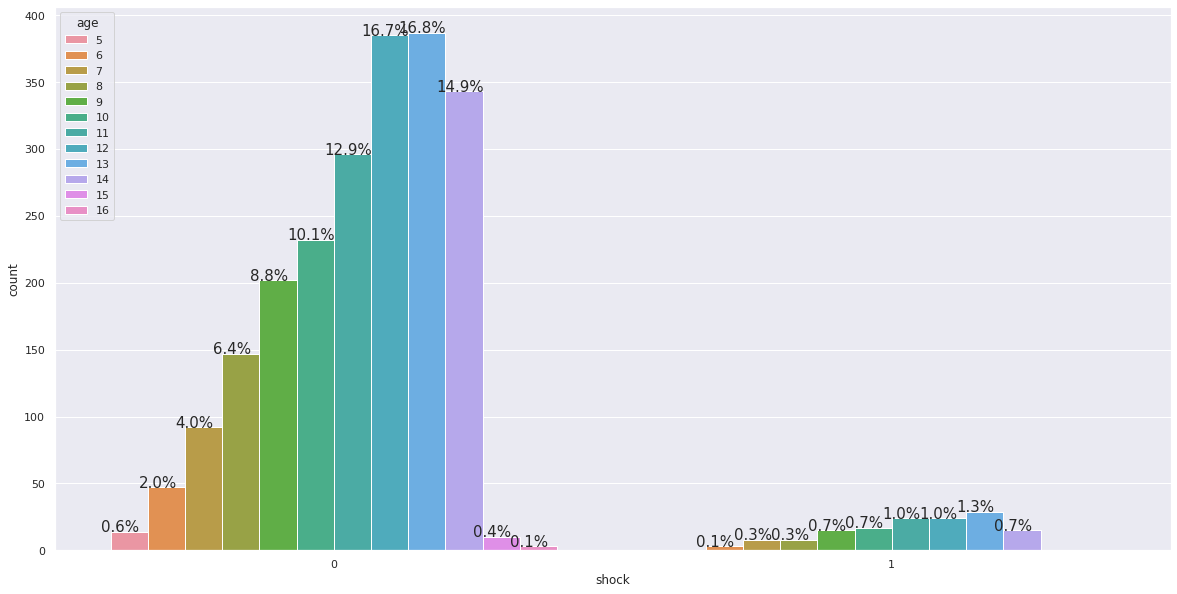

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="shock", hue="age", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =15)
show()


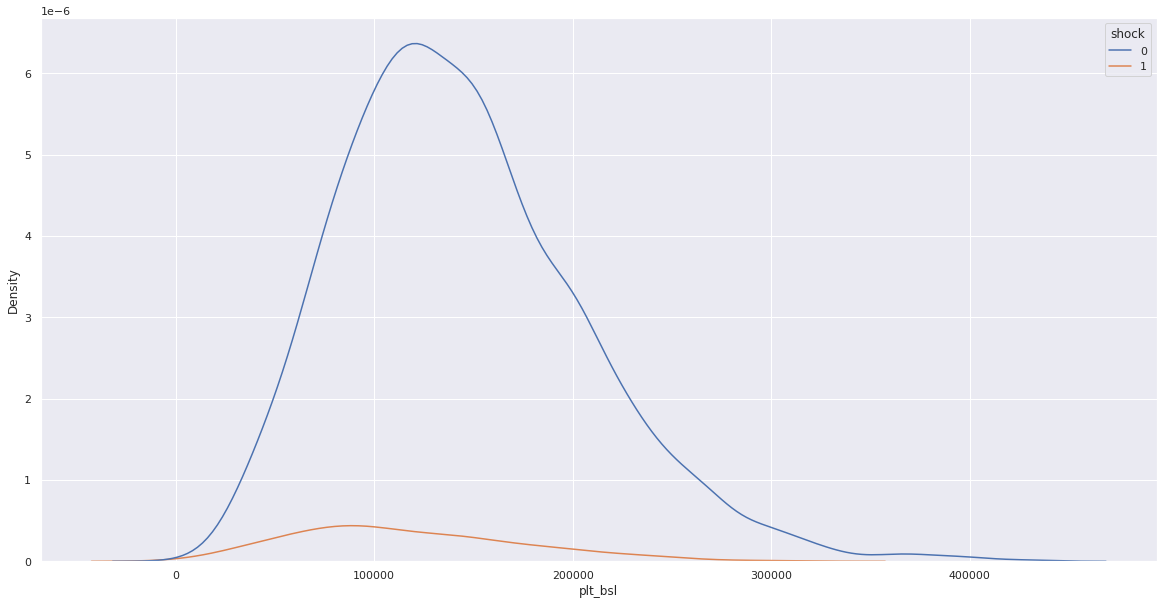

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="plt_bsl", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()


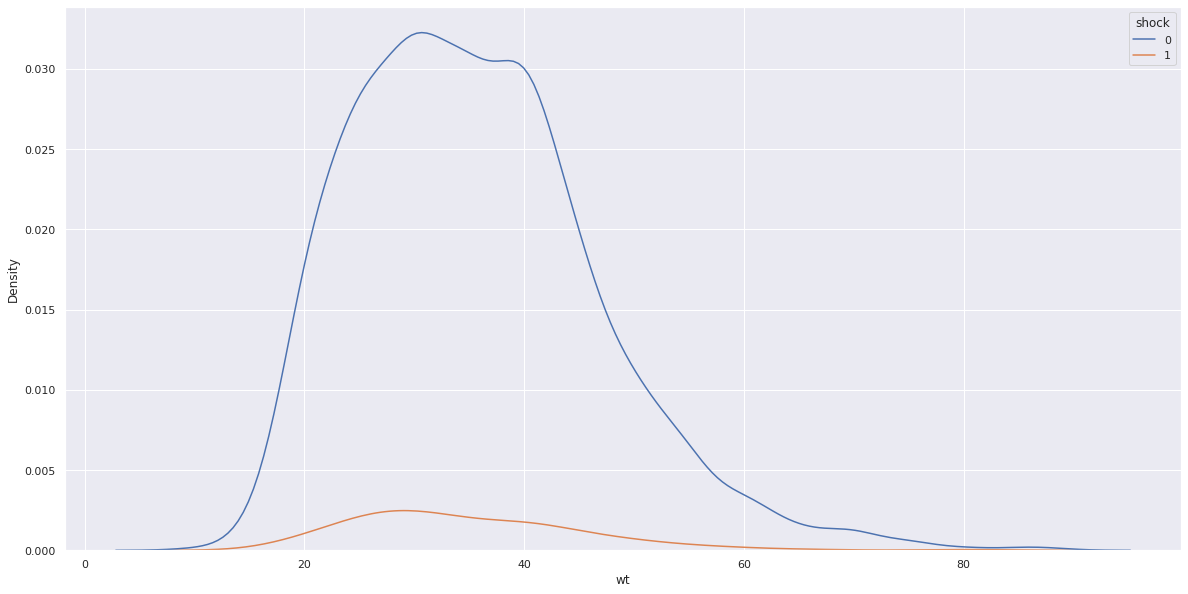

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="wt", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

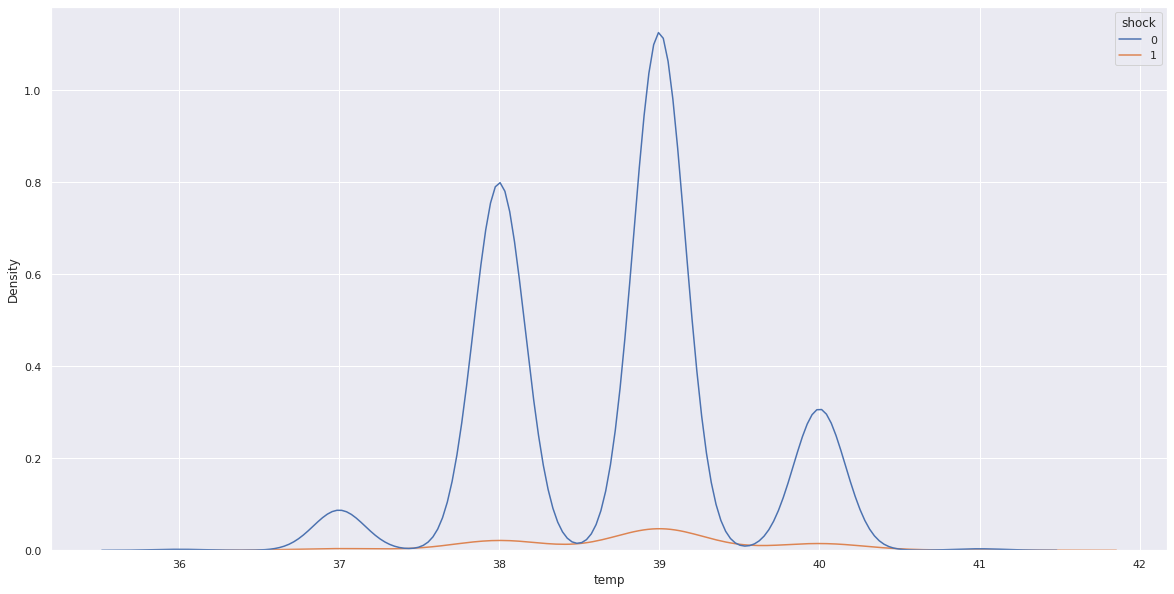

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="temp", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

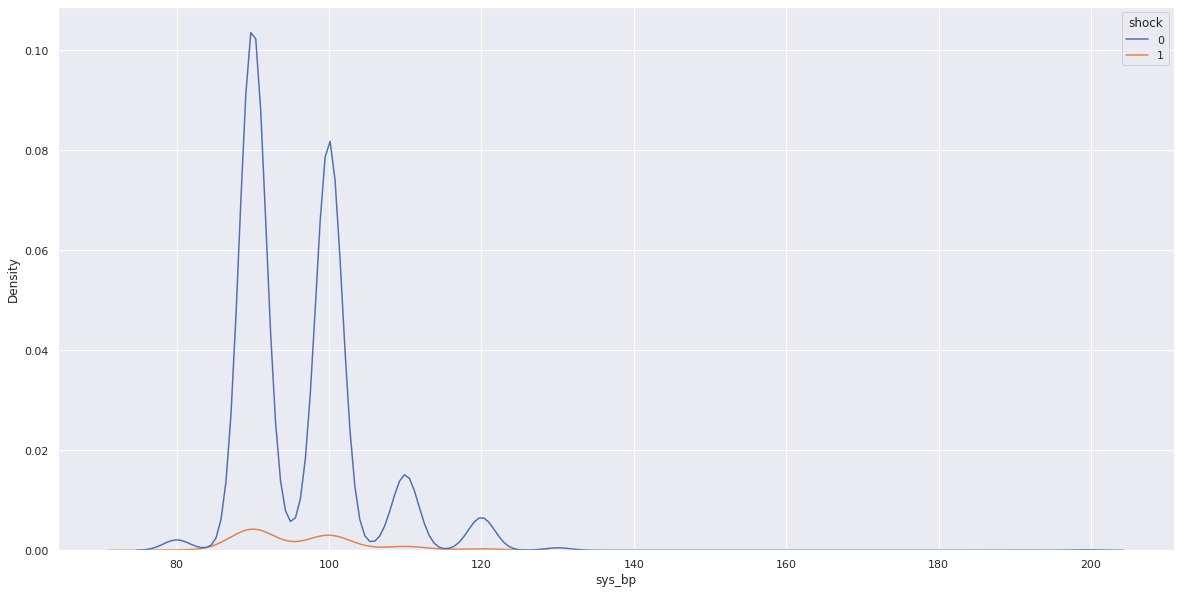

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="sys_bp", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

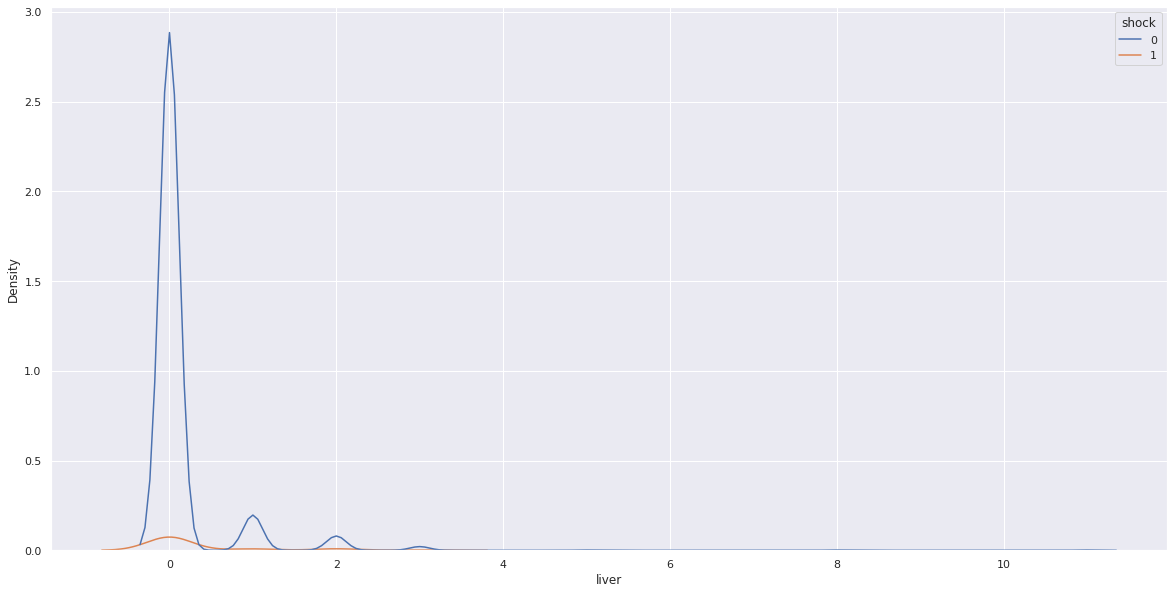

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="liver", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

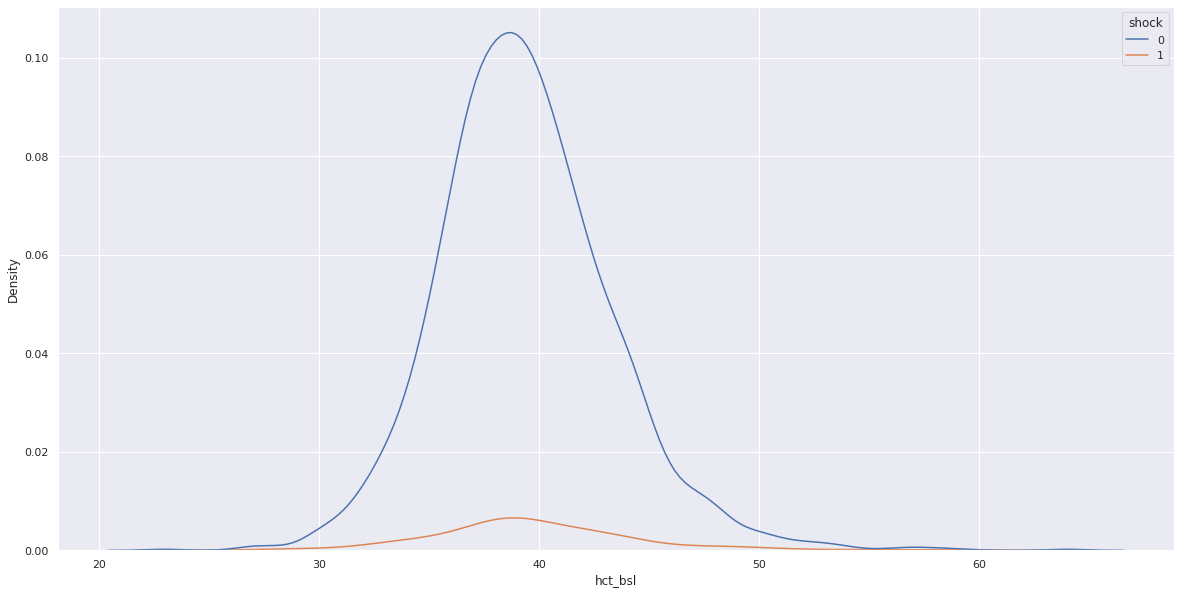

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="hct_bsl", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

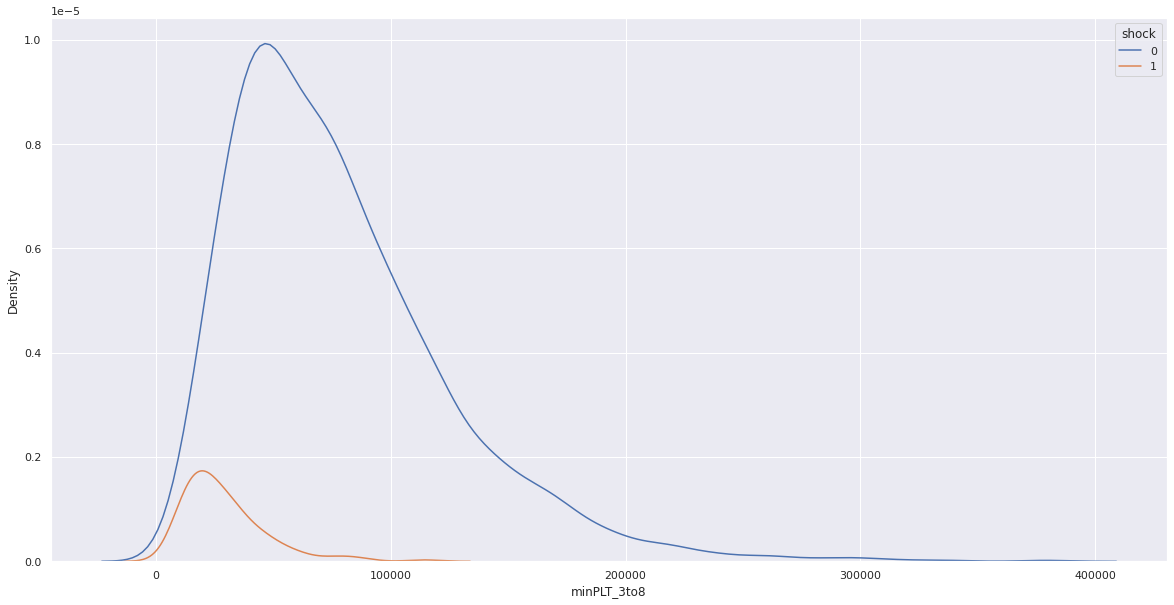

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="minPLT_3to8", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

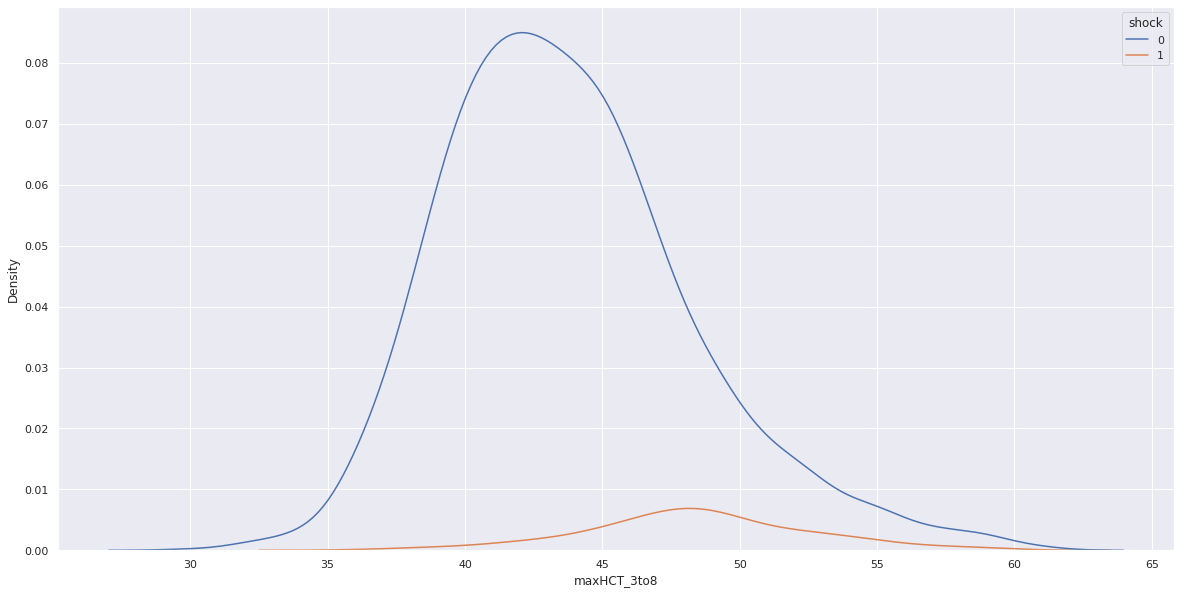

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="maxHCT_3to8", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

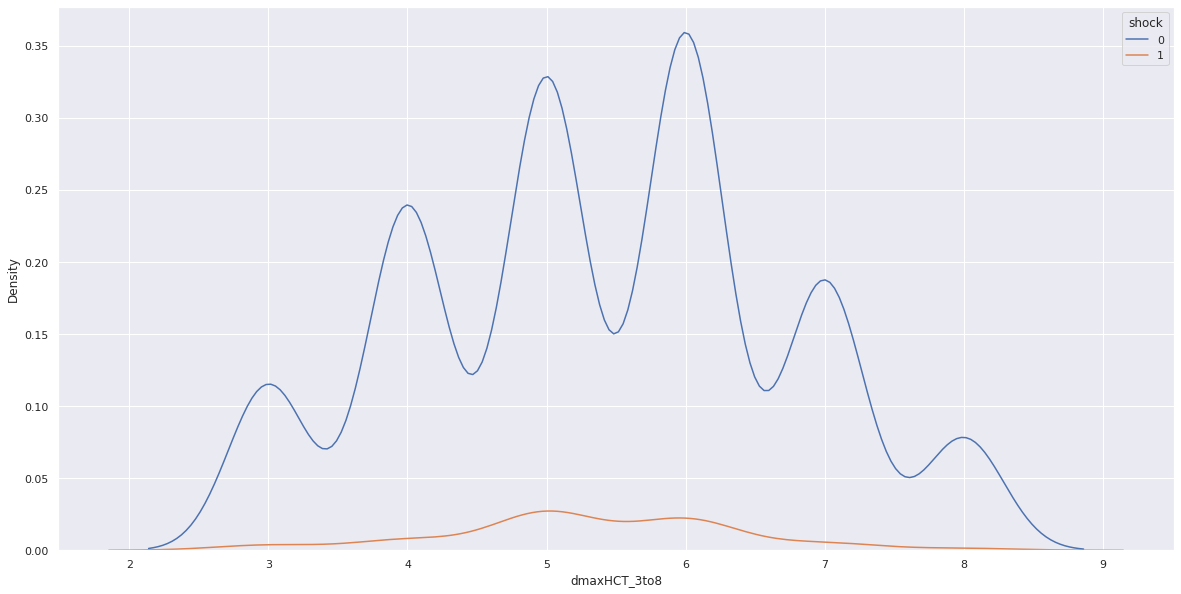

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="dmaxHCT_3to8", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

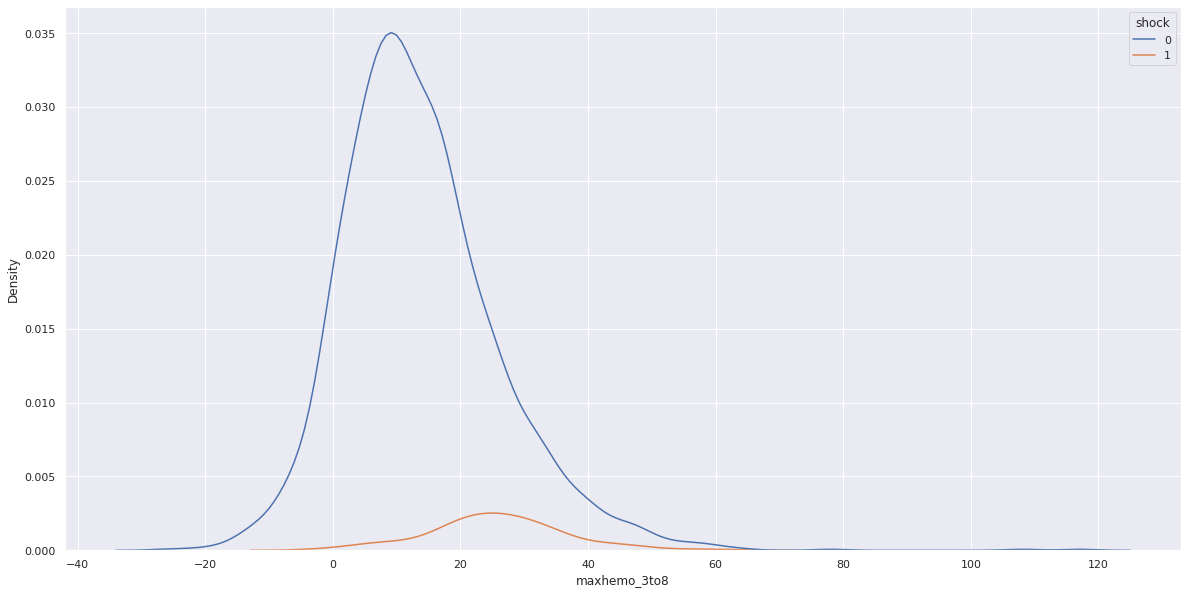

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(df_knn)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.kdeplot(x="maxhemo_3to8", hue="shock", data=df_knn) # for Seaborn version 0.7 and more
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)
show()

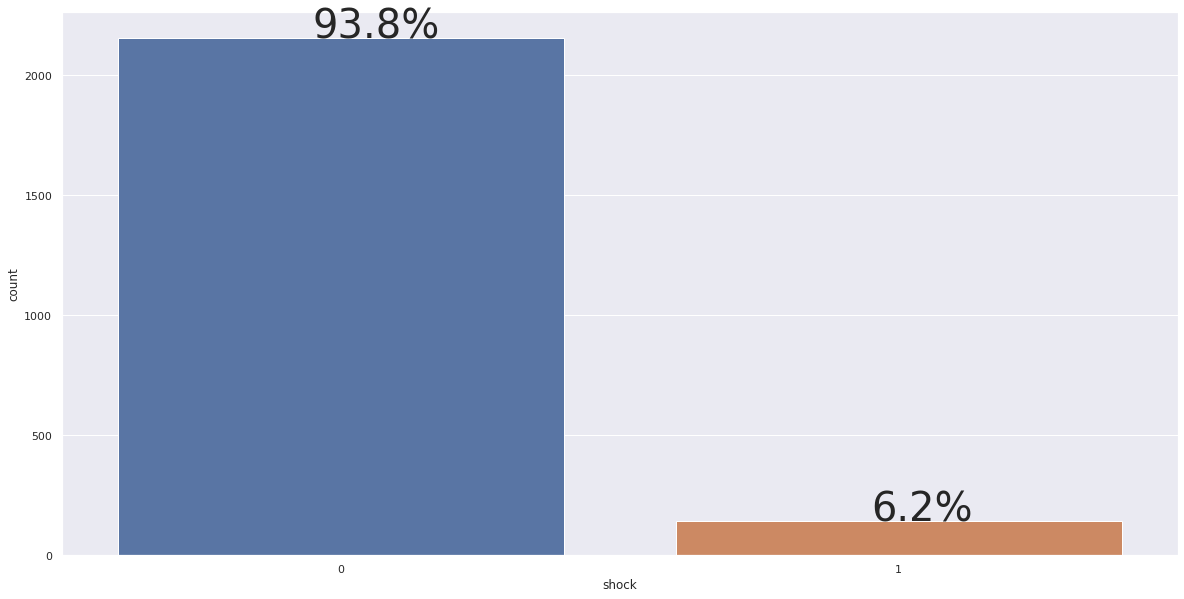

In [ ]:
ax=sns.countplot(x="shock",data=df_knn)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size =40)

https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b
https://slundberg.github.io/shap/notebooks/NHANES%20I%20Survival%20Model.html


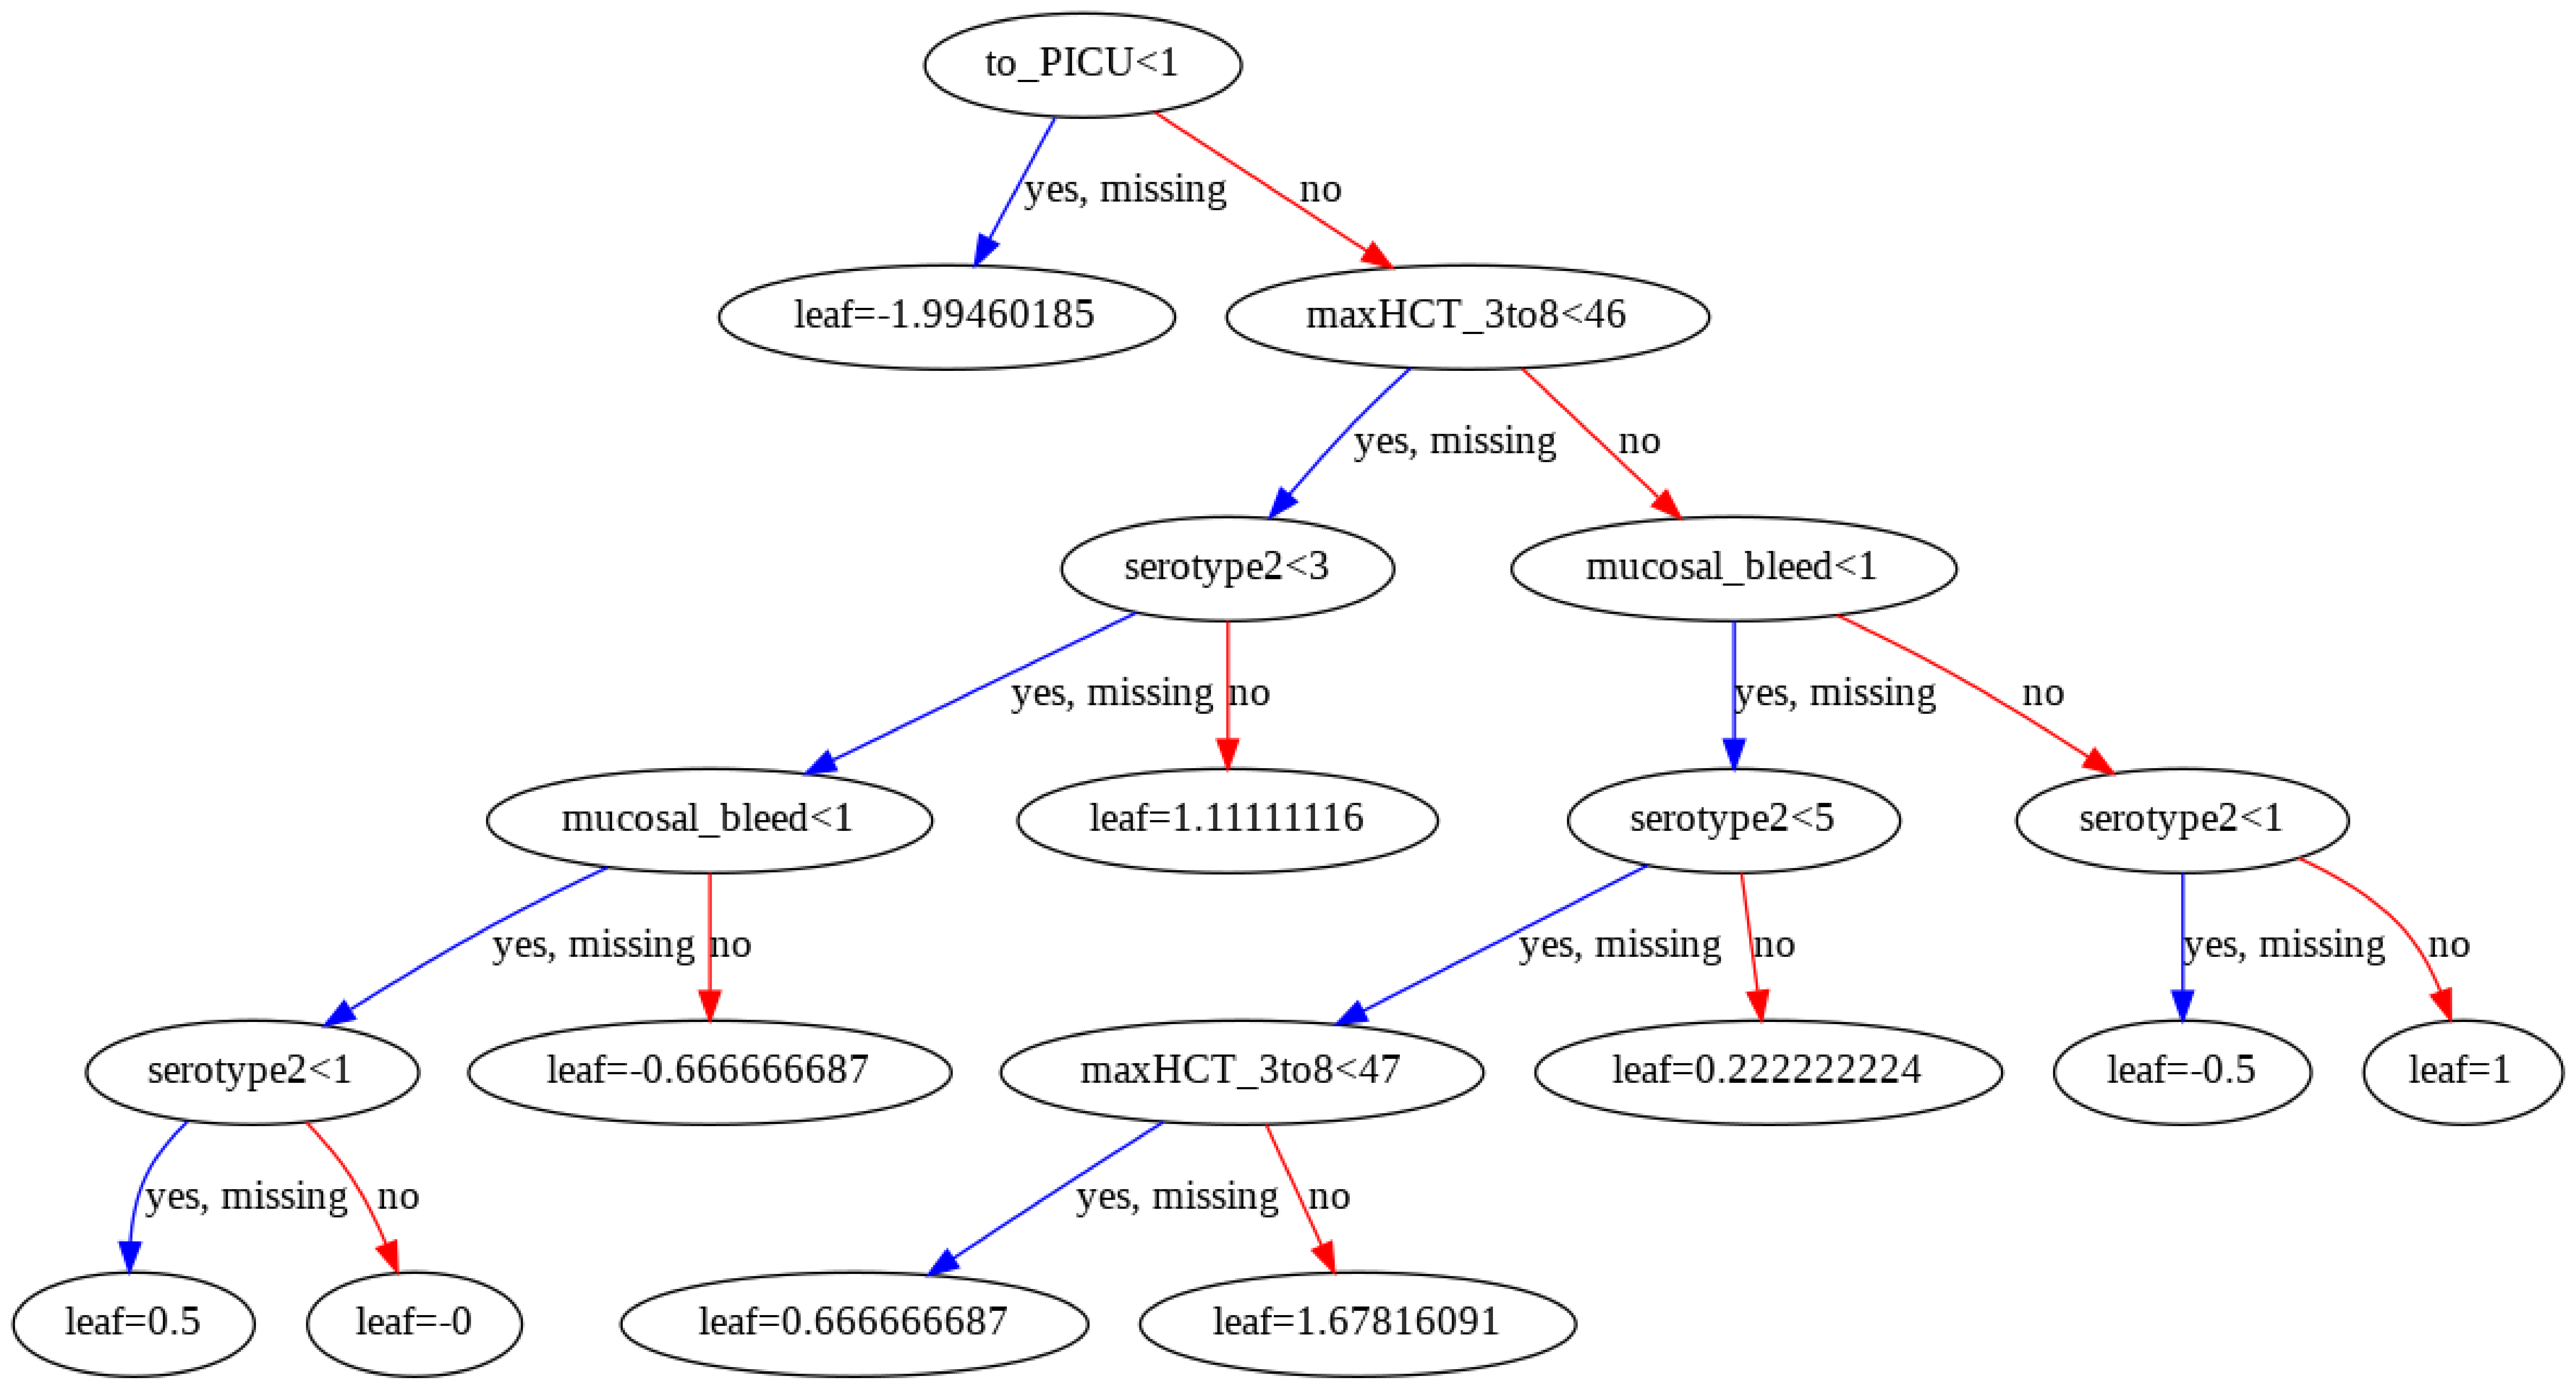

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
# plot single tree
plot_tree(xg)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.savefig("SingleTree.pdf")


# xgb.plot_tree(xg,num_trees=0)
# plt.rcParams['figure.figsize'] = [100, 101]
# plt.show()

In [ ]:
plot_tree(xg, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(100, 50)
plt.savefig("Tree1.pdf")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_tree(xg, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(100, 50)
plt.savefig("Tree2.pdf") 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_tree(xg, num_trees=3)
fig = plt.gcf()
fig.set_size_inches(100, 50)
plt.savefig("Tree3.pdf")

Output hidden; open in https://colab.research.google.com to view.

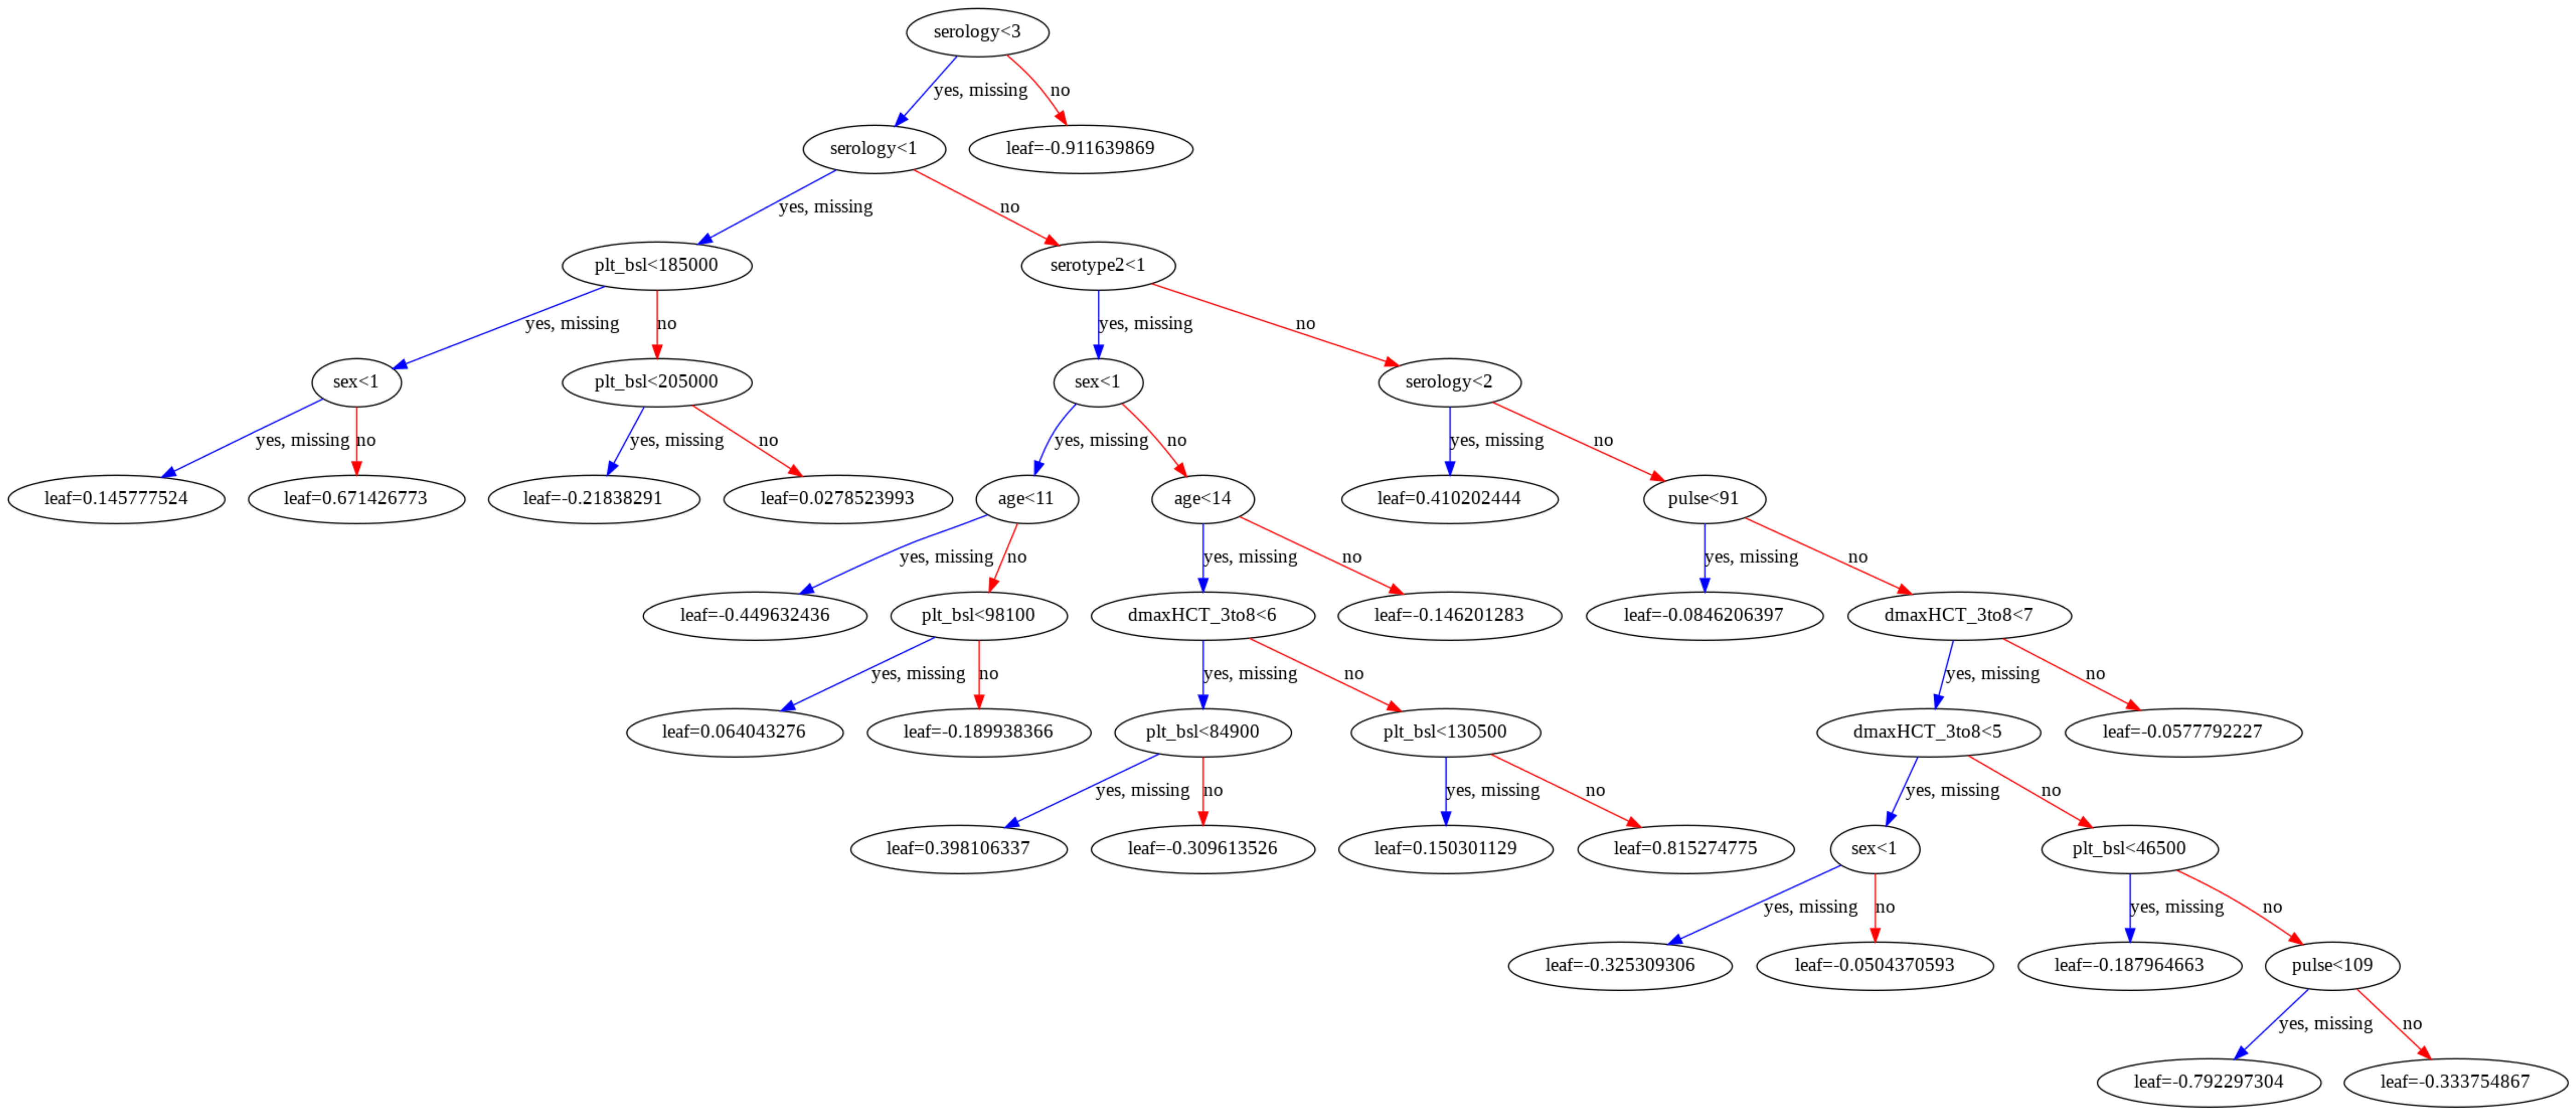

In [ ]:
plot_tree(xg, num_trees=4)
fig = plt.gcf()
fig.set_size_inches(100, 50)
plt.savefig("Tree4.pdf")

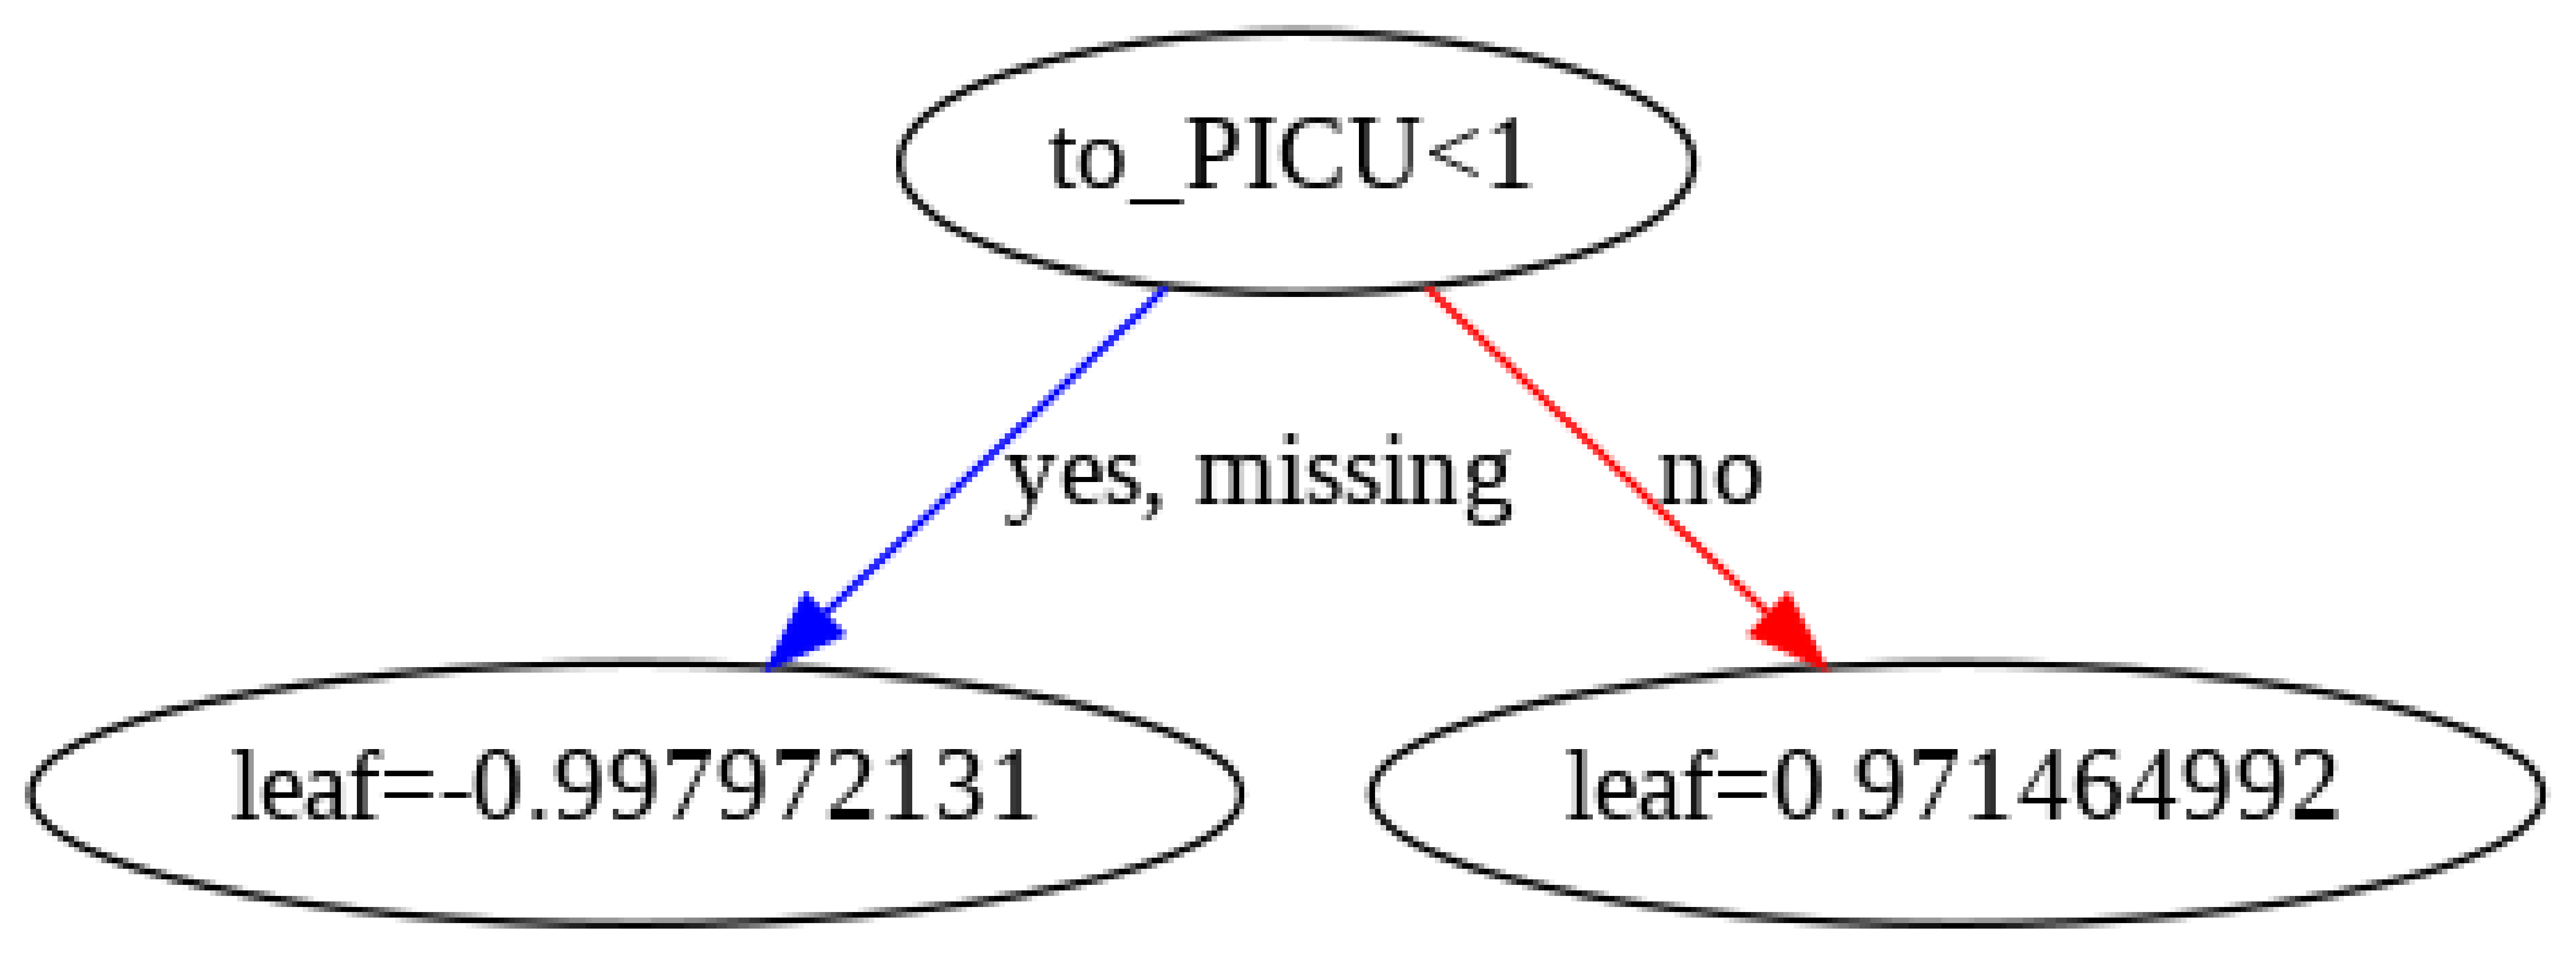

In [ ]:
plot_tree(xg, num_trees=5)
fig = plt.gcf()
fig.set_size_inches(100, 50)
plt.savefig("Tree5.pdf")

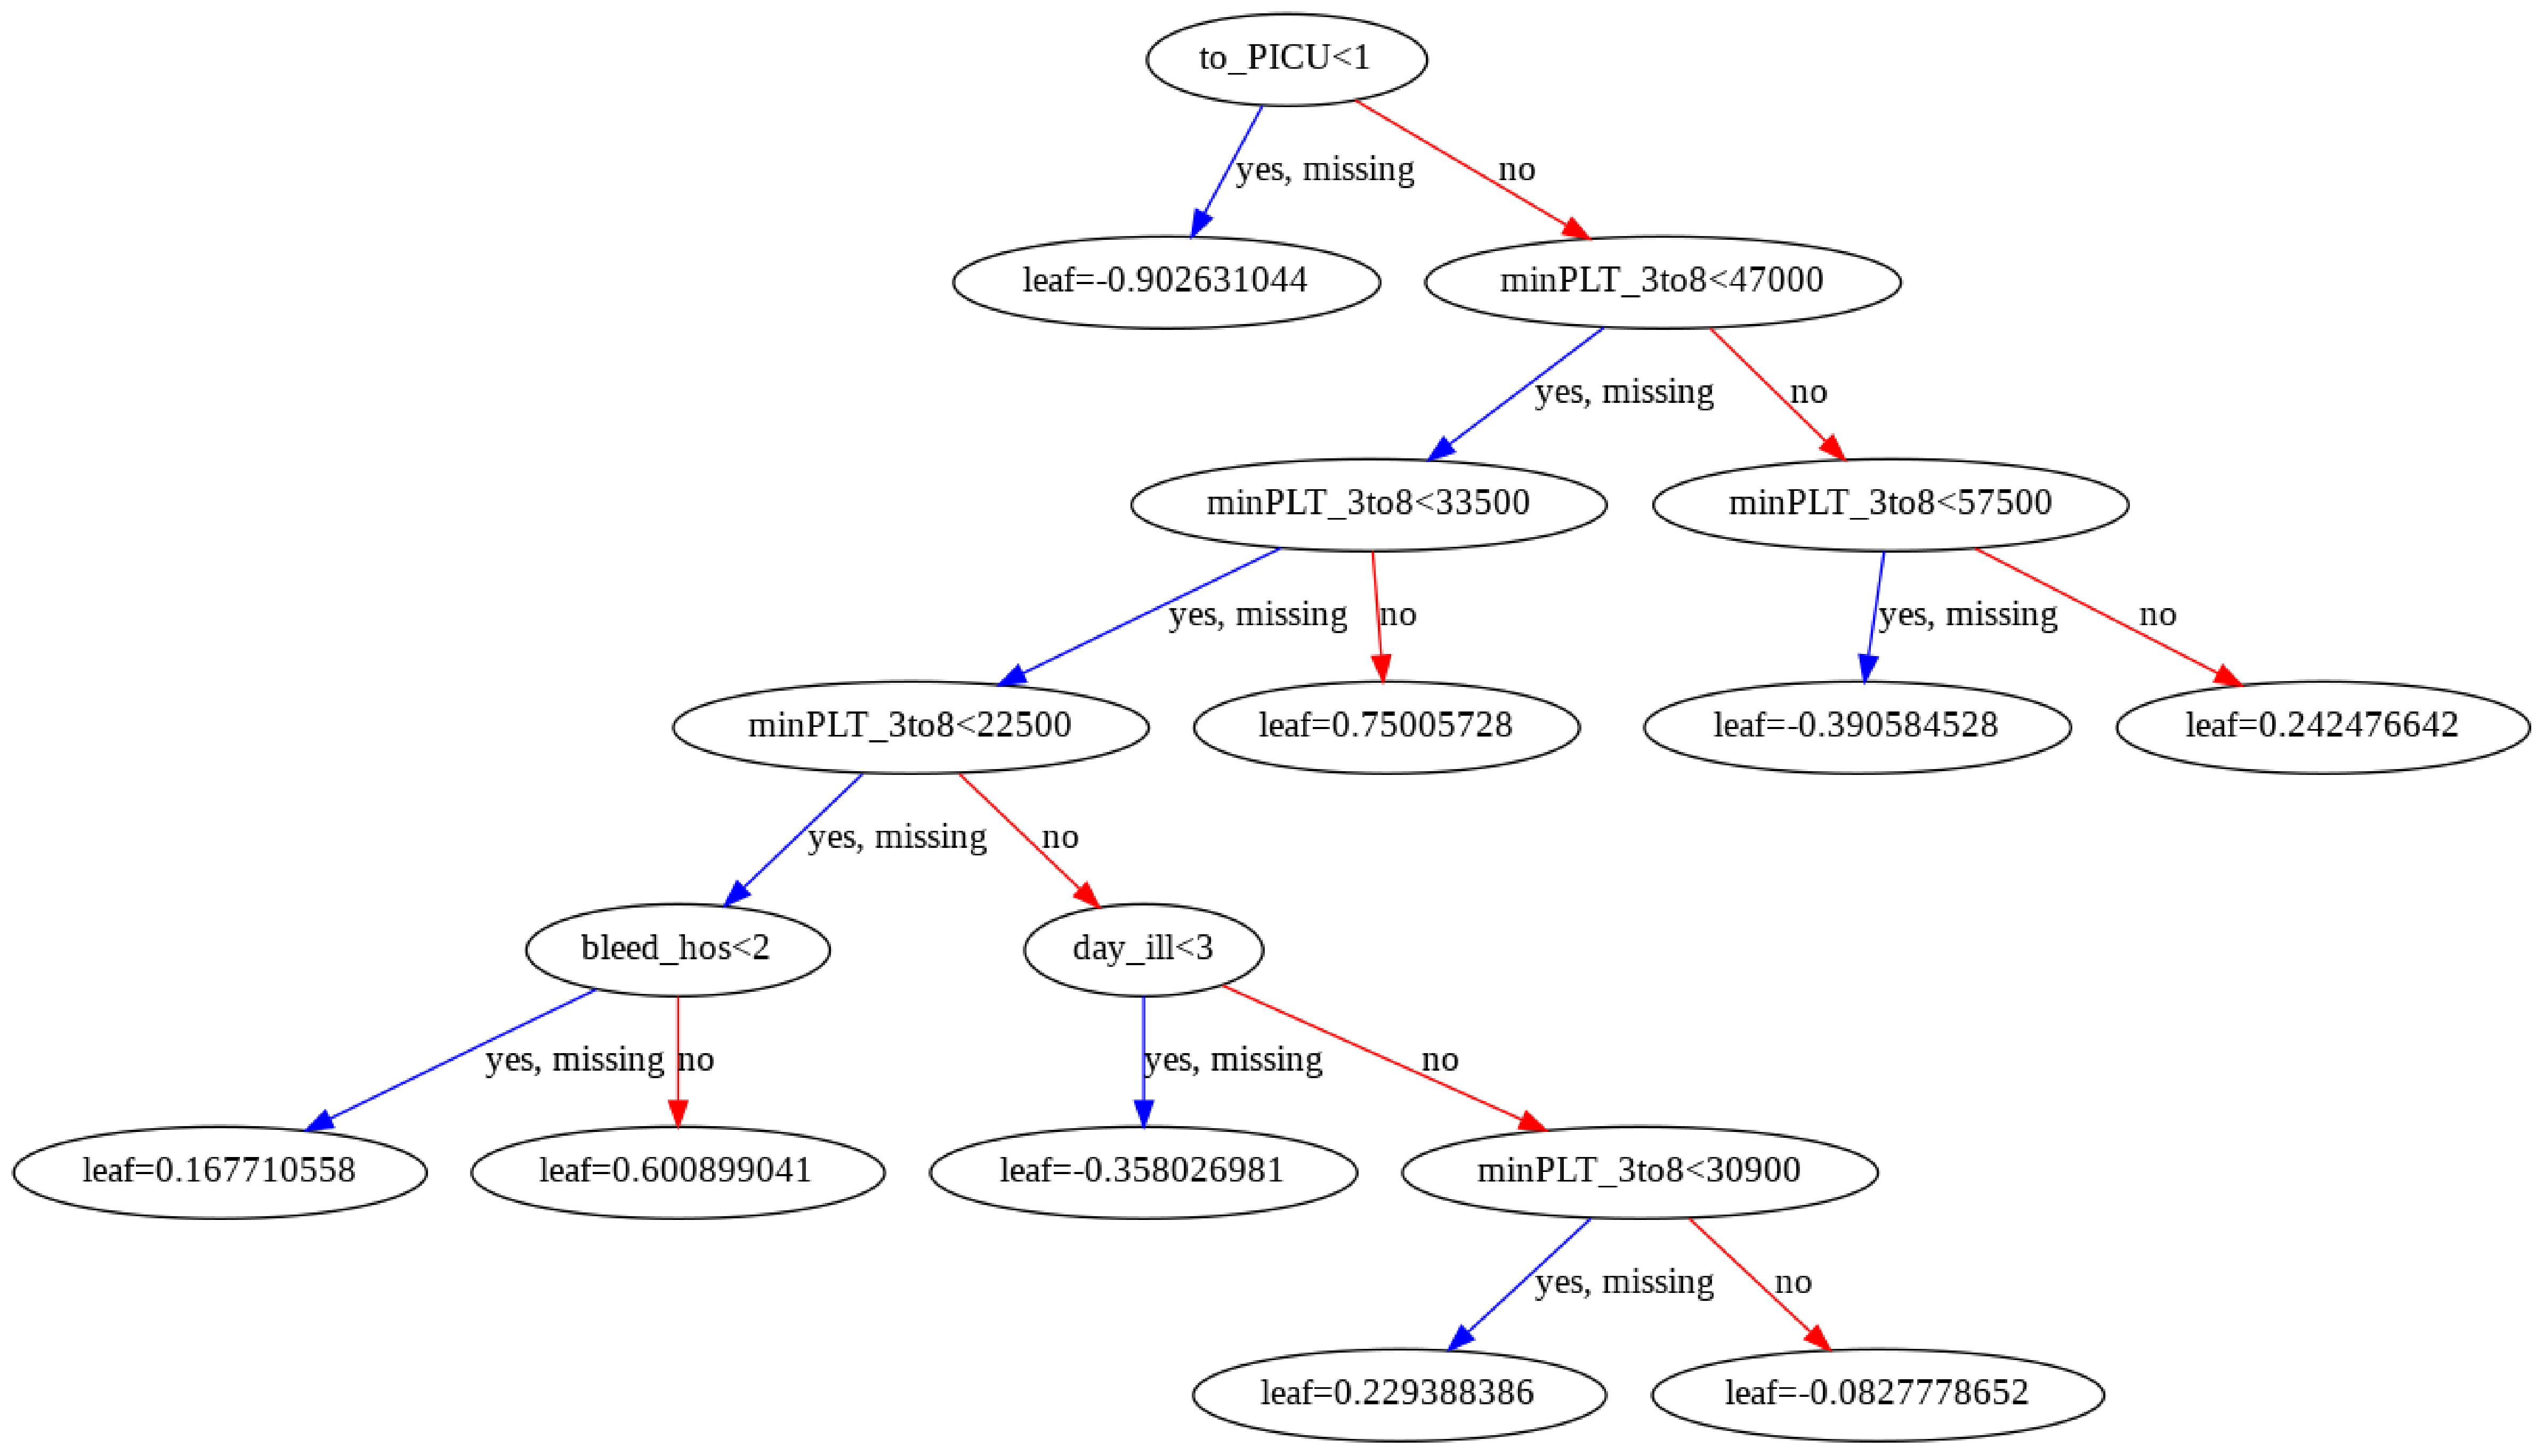

In [ ]:
plot_tree(xg, num_trees=6)
fig = plt.gcf()
fig.set_size_inches(100, 50) 
plt.savefig("Tree6.pdf")

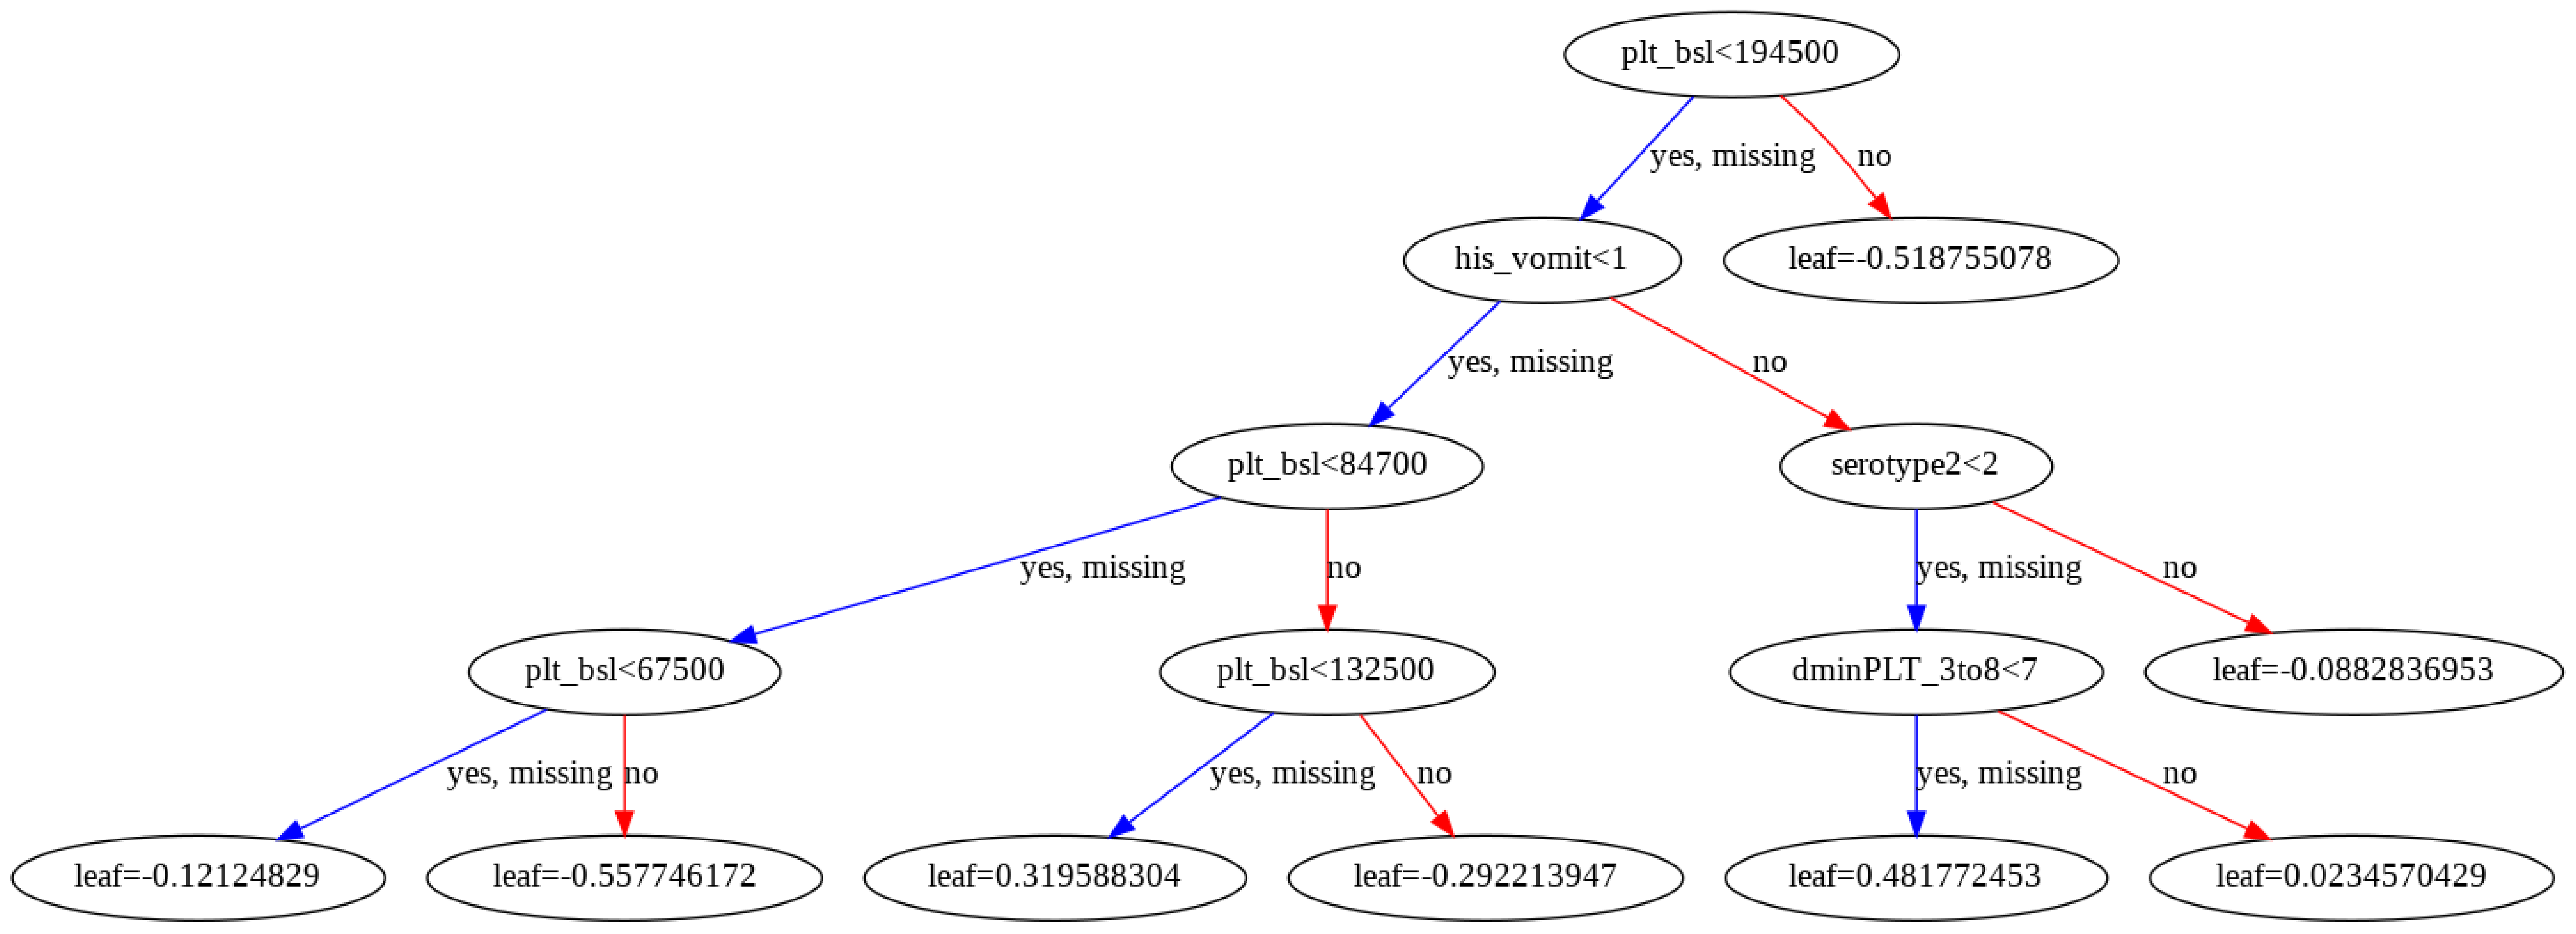

In [ ]:
plot_tree(xg, num_trees=7)
fig = plt.gcf()
fig.set_size_inches(100, 50)
plt.savefig("Tree7.pdf")

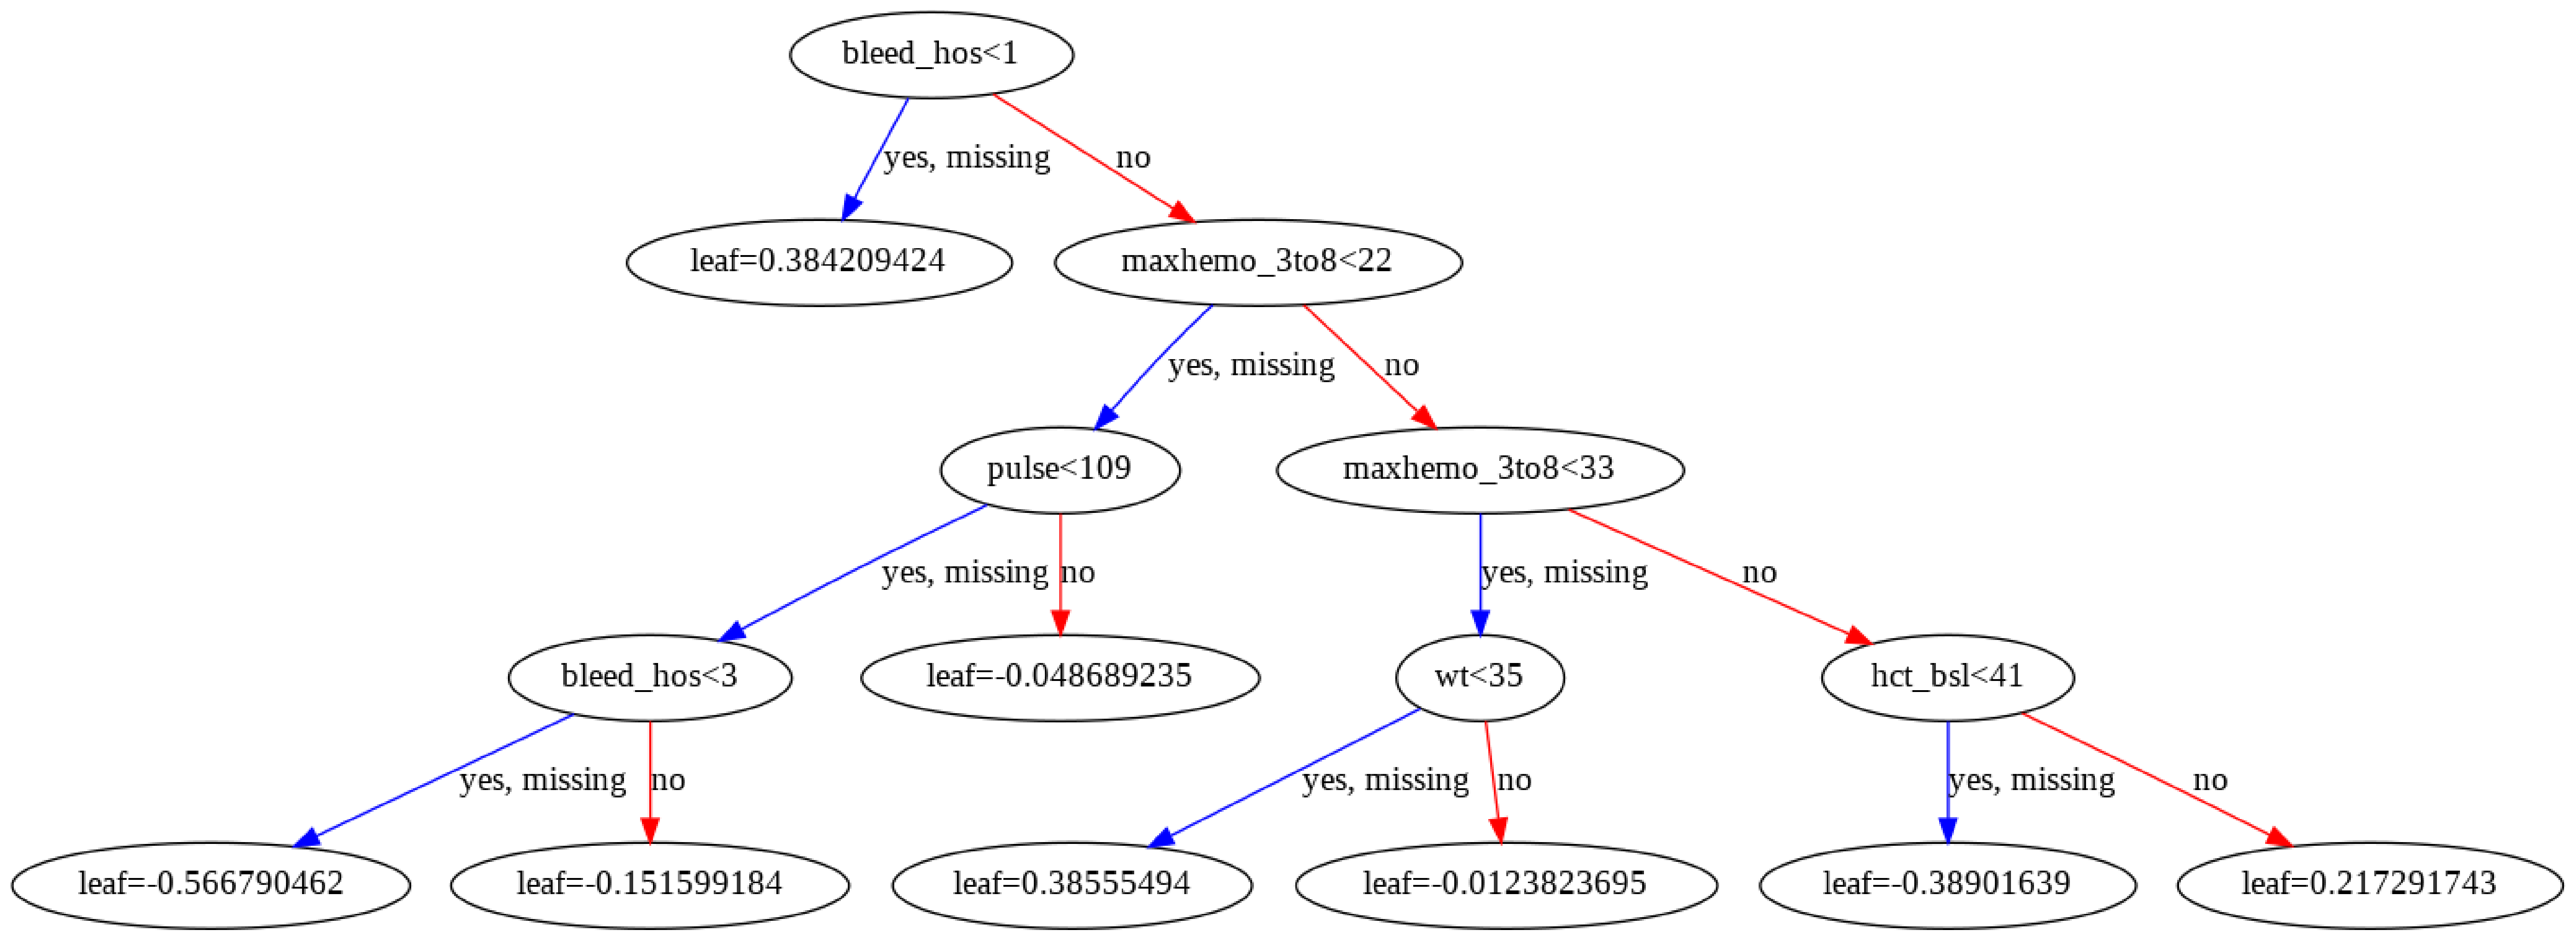

In [ ]:
plot_tree(xg, num_trees=8)
fig = plt.gcf()
fig.set_size_inches(100, 50)
plt.savefig("Tree8.pdf")

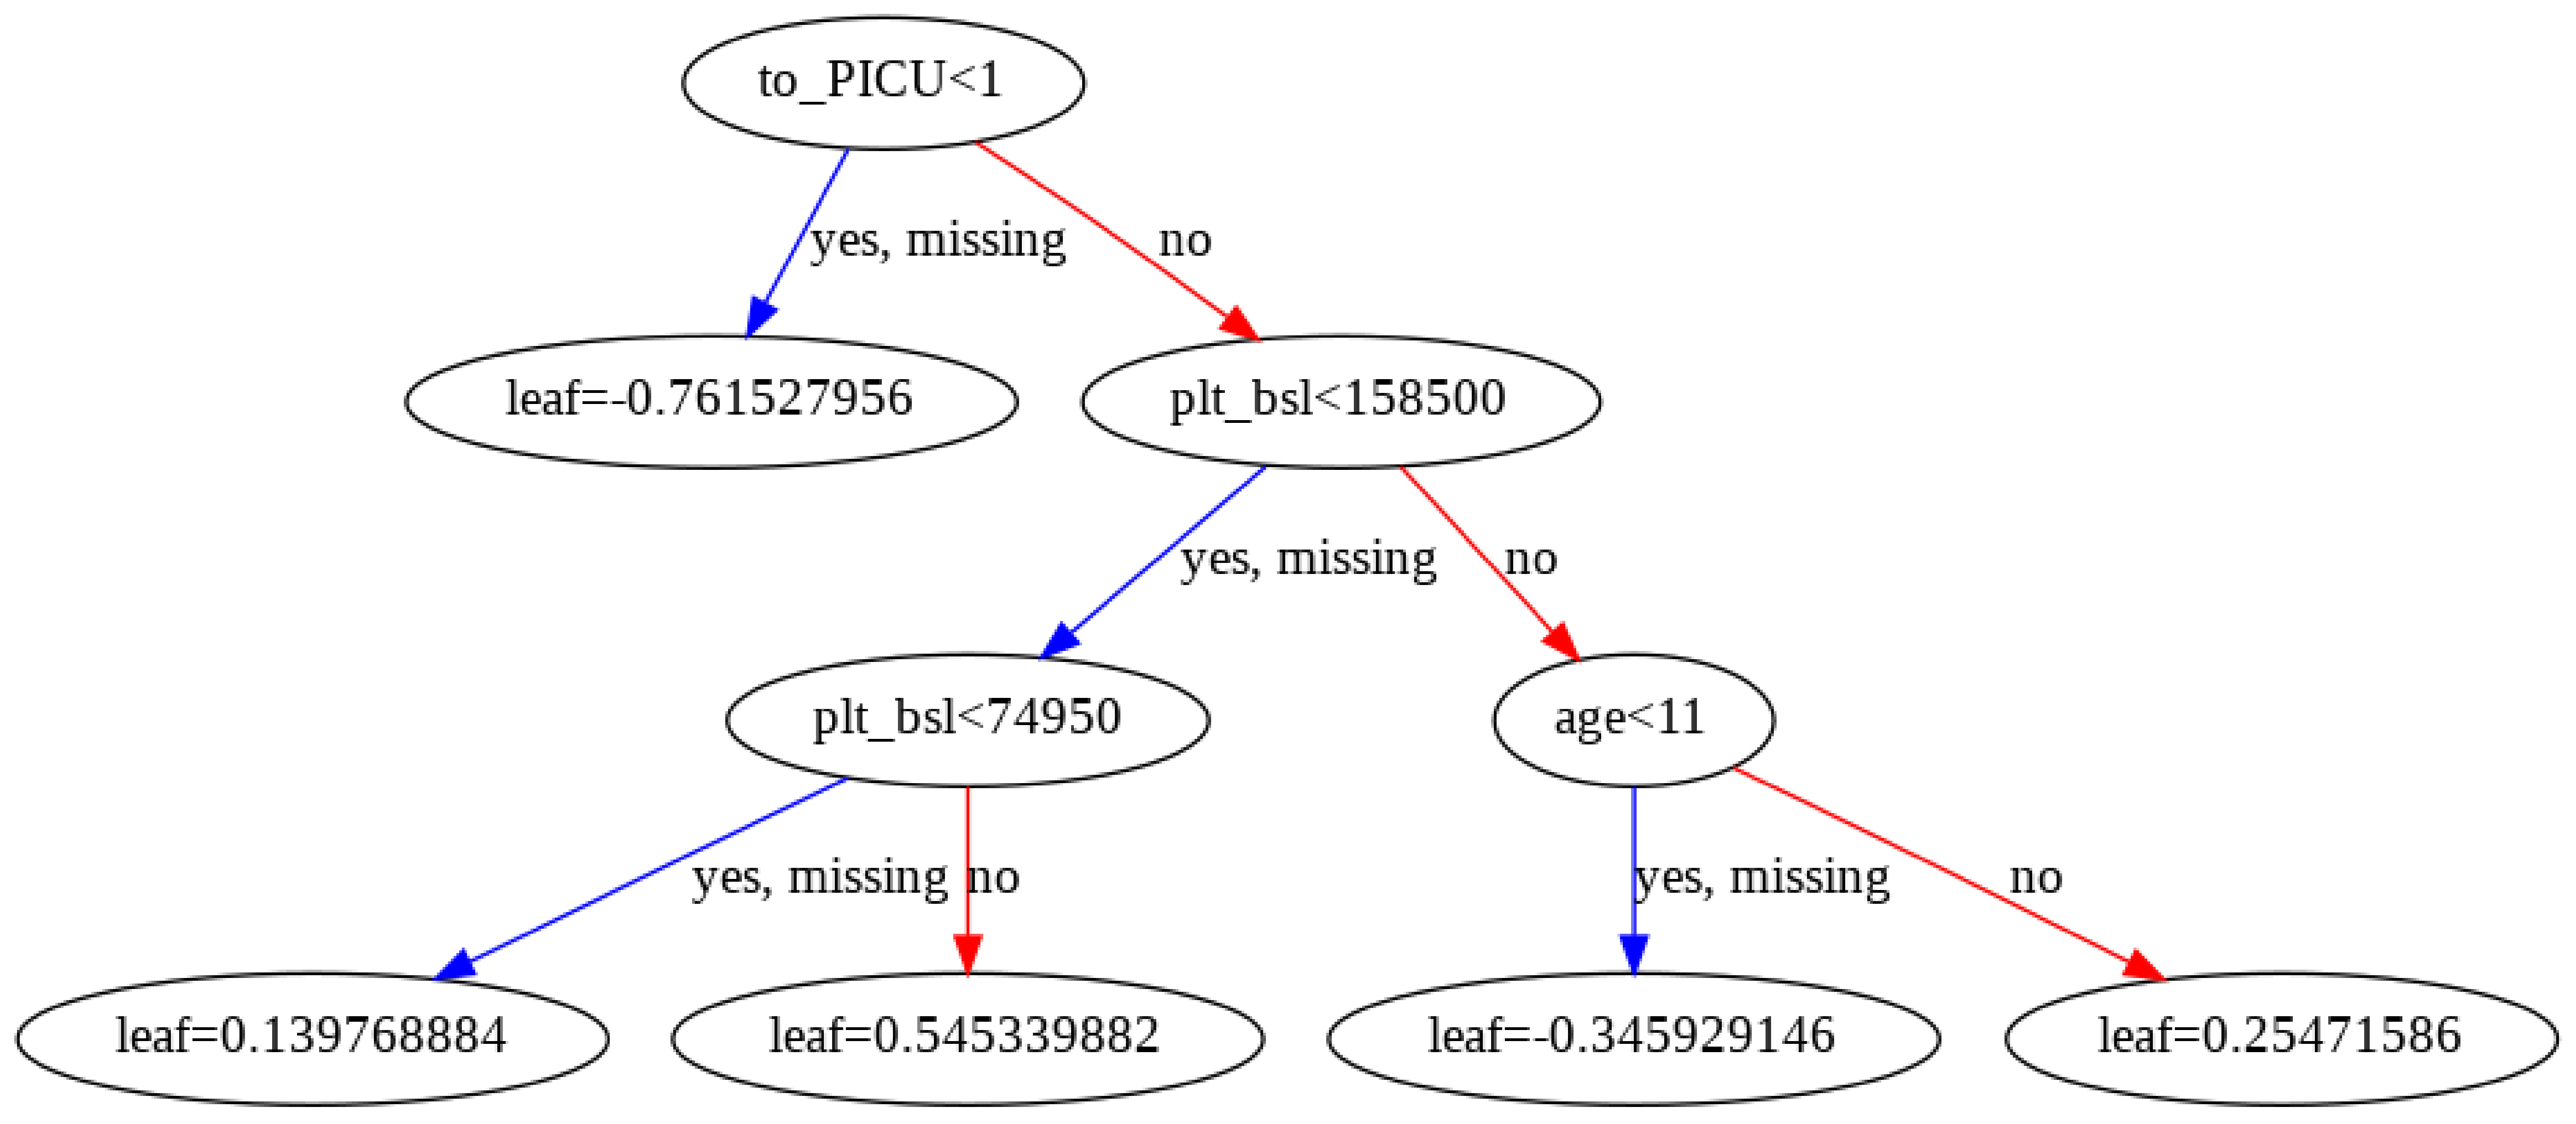

In [ ]:
plot_tree(xg, num_trees=9)
fig = plt.gcf()
fig.set_size_inches(100, 50)
plt.savefig("Tree9.pdf")

In [ ]:
#feautured_col=['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','serotype2','serology','to_PICU','shock','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8',])
